# Docagem das moleculas promissoras - projeto

## O que iremos investigar?
- O objetivo principal da nossa pesquisa é treinar um modelo de aprendizado de máquina que seja capaz de reconhecer padroes de moléculas de produtos naturais (especialmente oriundas de fungos e bactérias) que permita sinalizar moléculas promissoras a atuar contra o vírus da dengue.

## Qual conjunto de dados de moléculas?
- O conjunto de dados moleculares já está pronto. Ele foi obtido enquanto eu fazia meu doutorado. De onde? De inúmeras bases de dados que abrigam moléculas de diferentes origens. Para algumas, foi necessário um processo de web scrapping; para outras, a própria plataforma disponibiliza os dados.

## E qual o alvo?
- Escolhi o alvo da dengue pelo fato de estar com uma onda gigante no Brasil, e ser uma doença tropical. Para isso, precisamos da proteína associada ao vírus da dengue, e ela se chama 1L9K (código PDB).

## Preparo do alvo?
- Essas proteínas sao encontradas no formato .pdb. Porém, para nosso estudo, é necessário fazer algumas adaptações e encontrar a posição que iremos colocar cada molécula. Ou seja, todas as moléculas irão ser inseridas no sítio ativo da proteína e iremos obter um valor de afinidade. Essa afinidade é associada pela entalpia de ligação (medida em kcal/mol). Então, quando mais energia liberada, mais forte é a ligação com o alvo. Então necessitamos de moléculas que apresentem resultados negativos. Mas quanto negativo? Valores melhores do que -7.9 kcal/mol. Por quê? Porque esse valor é associado ao ligante-padrão já inserido na proteína. Precisamos de uma molécula de produto natural melhor que ela.

### Início - Carregue as imagens

In [ ]:
import pandas as pd
moleculas = pd.read_csv('moleculas_61441.csv')
moleculas

,index,id,Smiles,Type,base,ExactMolWt
0,0,Lotus_Bac-1,C=CC1(C)CCC2=C(C1)C(O)CC1C(CO)=CC(=O)C(O)C21C,Bacteria,Lotus,318.183109
1,1,Lotus_Bac-2,COC1COC(Oc2cccc(CCCCCCCCCCC(=O)O)c2N)C(O)C1O,Bacteria,Lotus,439.257003
2,2,Lotus_Bac-3,C[C@H]1O[C@@H]2CC(=O)O[C@@H]2C2=C1C(=O)c1c(O)c...,Bacteria,Lotus,455.158017
3,3,Lotus_Bac-4,CCC1CCCC(CC)C(O)=NCCCC(C)C(OC2OC(C)C(O)C(N)C2O...,Bacteria,Lotus,442.340673
4,4,Lotus_Bac-7,COC(=O)C(C)C.O=C(O)c1cc2c(cn1)[nH]c1ccccc12,Bacteria,Lotus,314.126657
...,...,...,...,...,...,...
61437,61437,CNP0357394,CC=C1C2C=C(C)CC1(NC1OC(=O)C3=C4CC(C)(C)CC4C(C)...,Fungi,Coconut,506.278072
61438,61438,CNP0356327,CC=C(CO)C1=C(CCO)C(C)(C)CC1(C)CO,Fungi,Coconut,254.188195
61439,61439,CNP0164821,CC1=CC2OC3CC4OC(=O)C=CC=CC(=O)OCCC5(C)OC5C(=O)...,Fungi,Coconut,500.204633
61440,61440,CNP0356379,COC(=O)C(CCC=C(C)C)=C1C(OC(C)=O)CC2(C)C1C(O)C(...,Fungi,Coconut,618.340398


## Testando as 100 primeiras moleculas

### Agora temos 61442 moléculas. Que atendem ao nosso critério de massa molecular

In [ ]:
### retiradas das duplicadas

In [ ]:
moleculas = moleculas.drop_duplicates('Smiles')
moleculas

,index,id,Smiles,Type,base,ExactMolWt
0,0,Lotus_Bac-1,C=CC1(C)CCC2=C(C1)C(O)CC1C(CO)=CC(=O)C(O)C21C,Bacteria,Lotus,318.183109
1,1,Lotus_Bac-2,COC1COC(Oc2cccc(CCCCCCCCCCC(=O)O)c2N)C(O)C1O,Bacteria,Lotus,439.257003
2,2,Lotus_Bac-3,C[C@H]1O[C@@H]2CC(=O)O[C@@H]2C2=C1C(=O)c1c(O)c...,Bacteria,Lotus,455.158017
3,3,Lotus_Bac-4,CCC1CCCC(CC)C(O)=NCCCC(C)C(OC2OC(C)C(O)C(N)C2O...,Bacteria,Lotus,442.340673
4,4,Lotus_Bac-7,COC(=O)C(C)C.O=C(O)c1cc2c(cn1)[nH]c1ccccc12,Bacteria,Lotus,314.126657
...,...,...,...,...,...,...
61437,61437,CNP0357394,CC=C1C2C=C(C)CC1(NC1OC(=O)C3=C4CC(C)(C)CC4C(C)...,Fungi,Coconut,506.278072
61438,61438,CNP0356327,CC=C(CO)C1=C(CCO)C(C)(C)CC1(C)CO,Fungi,Coconut,254.188195
61439,61439,CNP0164821,CC1=CC2OC3CC4OC(=O)C=CC=CC(=O)OCCC5(C)OC5C(=O)...,Fungi,Coconut,500.204633
61440,61440,CNP0356379,COC(=O)C(CCC=C(C)C)=C1C(OC(C)=O)CC2(C)C1C(O)C(...,Fungi,Coconut,618.340398


In [ ]:
# moleculas.reset_index(inplace=True, drop = True)

In [ ]:
## Verificar quantas moléculas de cada classe existem

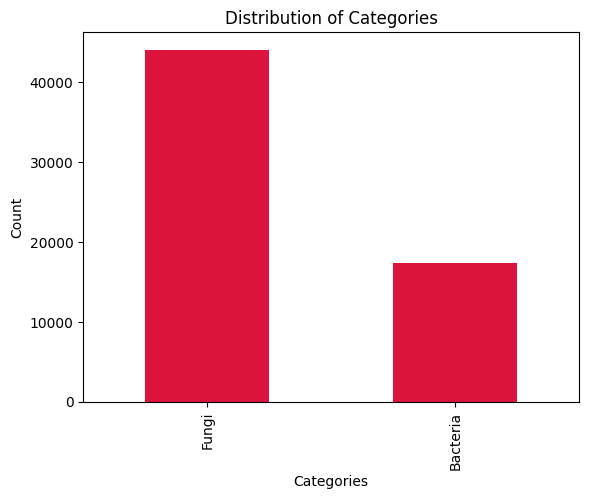

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_count = moleculas['Type'].value_counts()

# Create a bar plot
category_count.plot(kind='bar', color='crimson')
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [ ]:
## Quais bases de dados foram retiradas

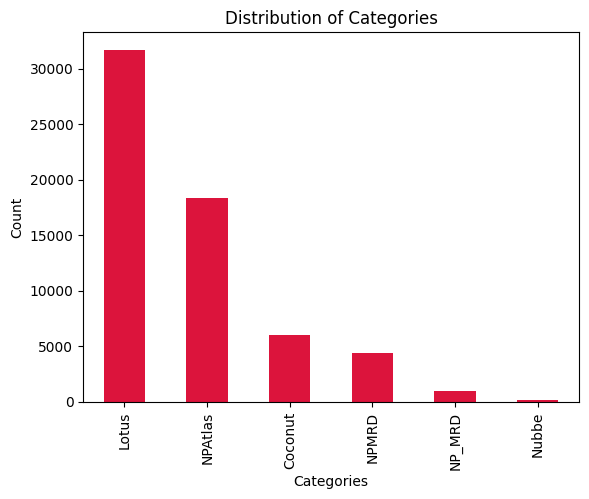

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_count = moleculas['base'].value_counts()

# Create a bar plot
category_count.plot(kind='bar', color='crimson')
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

## Sugiro comecarem explorando apenas 100 moleculas (para verificar se funciona)

In [ ]:
moleculas_teste = moleculas.loc[moleculas.index<100]

In [ ]:
# df_pequenasmoleculas.reset_index(inplace=True, drop=True)
teste = moleculas_teste

In [ ]:
### Nesse primeiro momento. Precisamos da molécula escrita no formato SMILES

In [ ]:
teste = teste[['index', 'Smiles']]


In [ ]:
df = teste
df

,index,Smiles
0,0,C=CC1(C)CCC2=C(C1)C(O)CC1C(CO)=CC(=O)C(O)C21C
1,1,COC1COC(Oc2cccc(CCCCCCCCCCC(=O)O)c2N)C(O)C1O
2,2,C[C@H]1O[C@@H]2CC(=O)O[C@@H]2C2=C1C(=O)c1c(O)c...
3,3,CCC1CCCC(CC)C(O)=NCCCC(C)C(OC2OC(C)C(O)C(N)C2O...
4,4,COC(=O)C(C)C.O=C(O)c1cc2c(cn1)[nH]c1ccccc12
...,...,...
95,95,COC(=O)c1c(OC)cc2cc3c(c(O)c2c1C)C(=O)OC3C1(O)C...
96,96,COC(=O)[C@H]1COC(c2ccccc2O)=N1
97,97,OC[C@H]1O[C@@H](n2cnnc2O)[C@H](O)[C@@H]1O
98,98,COc1cccc2c1[C@H](OC1OC(C)C(O)C(O)C1O)[C@@]1(O)...


In [ ]:
# df.rename(columns = {'index':'id'},  inplace=True)

In [ ]:
ids = []
for i in df['index']:
    a = str(i)
    ids.append(a)

df['index'] = ids

C:\Users\Rafa\anaconda3\envs\principal\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# df = df.loc[df.index!=5]

In [ ]:
df

,index,Smiles
0,0,C=CC1(C)CCC2=C(C1)C(O)CC1C(CO)=CC(=O)C(O)C21C
1,1,COC1COC(Oc2cccc(CCCCCCCCCCC(=O)O)c2N)C(O)C1O
2,2,C[C@H]1O[C@@H]2CC(=O)O[C@@H]2C2=C1C(=O)c1c(O)c...
3,3,CCC1CCCC(CC)C(O)=NCCCC(C)C(OC2OC(C)C(O)C(N)C2O...
4,4,COC(=O)C(C)C.O=C(O)c1cc2c(cn1)[nH]c1ccccc12
...,...,...
95,95,COC(=O)c1c(OC)cc2cc3c(c(O)c2c1C)C(=O)OC3C1(O)C...
96,96,COC(=O)[C@H]1COC(c2ccccc2O)=N1
97,97,OC[C@H]1O[C@@H](n2cnnc2O)[C@H](O)[C@@H]1O
98,98,COc1cccc2c1[C@H](OC1OC(C)C(O)C(O)C1O)[C@@]1(O)...


In [ ]:
df.rename(columns ={'Smiles':'smiles'}, inplace=True)

C:\Users\Rafa\anaconda3\envs\principal\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Processo de minimizacao de energia estrutural
-- as moleculas nao estao desenhadas, mas sim em forma de texto (SMILES).
-- Nesse momento, calculamos a energia associada a essas moleculas. Para depois, "desenha-las"

## Vou selecionar as 10 mil primeiras moleculas para testar:


In [ ]:
mols = []
from rdkit import Chem
from rdkit.Chem import AllChem

for _, row in df.iterrows():
    try:
        m = Chem.MolFromSmiles(row.smiles)

        m = Chem.AddHs(m)

        AllChem.EmbedMolecule(m, AllChem.ETKDG())
        minimize_status = AllChem.UFFOptimizeMolecule(m, 2000)

#         if not minimize_status == 0:
#             print(f"Failed to minimize_compound'{row['name']}")

        AllChem.ComputeGasteigerCharges(m)

        mols.append(m)
        print(row)

    except:
        print(f"Failed to minimize_compound'{row['index']}")
        m = Chem.MolFromSmiles(row.smiles)
        mols.append(m)
        print(row)


level_0                                                0
index                                                  0
smiles     C=CC1(C)CCC2=C(C1)C(O)CC1C(CO)=CC(=O)C(O)C21C
Name: 0, dtype: object
level_0                                               1
index                                                 1
smiles     COC1COC(Oc2cccc(CCCCCCCCCCC(=O)O)c2N)C(O)C1O
Name: 1, dtype: object
level_0                                                    2
index                                                      2
smiles     C[C@H]1O[C@@H]2CC(=O)O[C@@H]2C2=C1C(=O)c1c(O)c...
Name: 2, dtype: object
level_0                                                    3
index                                                      3
smiles     CCC1CCCC(CC)C(O)=NCCCC(C)C(OC2OC(C)C(O)C(N)C2O...
Name: 3, dtype: object
level_0                                              4
index                                                4
smiles     COC(=O)C(C)C.O=C(O)c1cc2c(cn1)[nH]c1ccccc12
Name: 4, dtype: object
level_0        

level_0                                                   42
index                                                     42
smiles     C[C@@H]1C(=O)[C@H](C)[C@H](Nc2ccccc2C(=O)O)[C@...
Name: 42, dtype: object
level_0                                                   43
index                                                     43
smiles     Cc1ccc2c(c1O)C(=O)c1c(cc(O)c(C(=O)O)c1C)[C@]2(...
Name: 43, dtype: object
level_0                                                 44
index                                                   44
smiles     Nc1ncnc2c1ncn2[C@H]1O[C@@H](CO)[C@H](O)[C@@H]1N
Name: 44, dtype: object
level_0                                     45
index                                       45
smiles     CC/C=C(C)/C=C/c1cc(=O)cc(C(Cl)Br)o1
Name: 45, dtype: object
level_0                                                   46
index                                                     46
smiles     COC(=O)[C@@H]1C[C@@H](O)[C@H](O)[C@@H](n2cc(CC...
Name: 46, dtype: object
level_0      

level_0                                                   84
index                                                     84
smiles     CCCc1c(Cl)c2c(c(=O)n1C)C(=O)C1=C(CCc3c1c(O)c1c...
Name: 84, dtype: object
level_0                                                   85
index                                                     85
smiles     C=C(C)[C@H]1CC[C@@]2(C)[C@@H]3CC[C@H]4[C@@]5(C...
Name: 85, dtype: object
level_0                                    86
index                                      86
smiles     COC1CC(C)Nc2c1c1nc3ccccc3oc-1cc2=O
Name: 86, dtype: object
level_0                                                   87
index                                                     87
smiles     CC(=O)C(C)C1CCC2C3C(O)CC4=CC(=O)C=CC4(C)C3CC(O...
Name: 87, dtype: object
level_0                                          88
index                                            88
smiles     COC(=O)CCc1nc(C(=O)OC)cc2c1[nH]c1ccccc12
Name: 88, dtype: object
level_0                              

level_0                                                  130
index                                                    130
smiles     CC(=O)OC1c2c3c(n(C#N)c2C(OC(C)=O)C(C)(OC(=O)C(...
Name: 130, dtype: object
level_0                                                  131
index                                                    131
smiles     C[C@H]1CCC[C@H](C)C(O)=NCCC[C@@H](C)[C@@H](O[C...
Name: 131, dtype: object
level_0                                    132
index                                      132
smiles     CC/C=C(C)/C=C/c1cc(=O)cc(C(Cl)Cl)o1
Name: 132, dtype: object
level_0                                                  133
index                                                    133
smiles     COc1cc(/C=N\O[C@@H]2O[C@@H](C)[C@H](O)[C@@H](O...
Name: 133, dtype: object
level_0                                                  134
index                                                    134
smiles     CC[C@H]1CCC[C@@H](CC)C(O)=NCCC[C@H](CC)[C@H](O...
Name: 134, dtype: object
le

level_0                                                 173
index                                                   173
smiles     CC1CCCC(C)C(O)=NCCCC(C)C(OC2OC(C)C(O)C(N)C2O)CC1
Name: 173, dtype: object
level_0                                                  174
index                                                    174
smiles     OC[C@@]12OC[C@H]3O[C@@](CO)(OC[C@@H](O1)[C@@H]...
Name: 174, dtype: object
level_0                                                  175
index                                                    175
smiles     COc1cc2c(c(C)c1C(=O)O)C(=O)c1c(ccc(C)c1O)[C@@]...
Name: 175, dtype: object
level_0                                                  176
index                                                    176
smiles     C[C@@H](C[C@@H](C)C(=O)/C=C(/O)c1[nH]c(Cl)c(Cl...
Name: 176, dtype: object
level_0                                                  177
index                                                    177
smiles     C[C@H](CC[C@@H](O)[C@@H](O)[C@H](O)CO)

level_0                                                  214
index                                                    214
smiles     CC(=O)OCCCC(C)C1CCC2(C)C1CCC1(C)C2CCC2C3(C)CCC...
Name: 214, dtype: object
level_0                              215
index                                215
smiles     Nc1ncnc2c1ncn2C1OC(CO)C(O)C1N
Name: 215, dtype: object
level_0                                       216
index                                         216
smiles     COC1C(C)OC(Oc2cccc3c2N=C(O)CC3)C(O)C1O
Name: 216, dtype: object
level_0                                                  217
index                                                    217
smiles     COC(=O)C1CSC(C(C)CC(C)CC(C)C(=O)/C=C(\O)c2[nH]...
Name: 217, dtype: object
level_0                                                  218
index                                                    218
smiles     CN[C@H](C(O)=N[C@@H](Cc1ccc(O)cc1)C(O)=NC(Cc1c...
Name: 218, dtype: object
level_0                       219
index              

[12:47:48] UFFTYPER: Unrecognized charge state for atom: 30
[12:47:48] UFFTYPER: Unrecognized charge state for atom: 30


level_0                                                  231
index                                                    231
smiles     Cc1ccc2c(c1O)C(=O)c1c(C)cc(O[C@H]3O[C@H](CO)[C...
Name: 231, dtype: object
level_0                                                  232
index                                                    232
smiles     COC1C(C(OC2OC(C(=O)O)=CC(O)C2O)C(N)=O)OC(n2ccc...
Name: 232, dtype: object
level_0                                                  233
index                                                    233
smiles     O=Nc1[nH]c(O)c(-c2ccccc2)c1-c1ccc(O)c([N+](=O)...
Name: 233, dtype: object
level_0                                                  234
index                                                    234
smiles     CCC(=O)[C@H](C)[C@@H](O)[C@@H](C)C(=O)CC/C(C)=...
Name: 234, dtype: object
level_0                                            235
index                                              235
smiles     CCCCCCCCCCCCC/C=C/CC/C=C(\C)C(=O)NCCOC(C)=O
Nam

level_0                                                  273
index                                                    273
smiles     CC1OC(=O)C(NC(=O)c2cccc(NC=O)c2O)C(C)OC(=O)C(C...
Name: 273, dtype: object
level_0                                      274
index                                        274
smiles     NC(CCCCNC(=O)Cc1c[nH]c2ccccc12)C(=O)O
Name: 274, dtype: object
level_0                                         275
index                                           275
smiles     CC1=C2CC[C@H](C)[C@]23CC[C@@H](C3)C1(C)C
Name: 275, dtype: object
level_0                                                  276
index                                                    276
smiles     CC1=C(CC(O)CC(O)/C=C\C=C\C(C)=C\C=C\C(C)C(O)C(...
Name: 276, dtype: object
level_0                        277
index                          277
smiles     COCc1ccc(O)c(NC(C)=O)c1
Name: 277, dtype: object
level_0                            278
index                              278
smiles     COc1cc(C(=O)

level_0                                                  318
index                                                    318
smiles     CCC(=O)CCCCCCCCCCCCCOP1(=O)OC[C@H]2COC(=O)C2=C...
Name: 318, dtype: object
level_0                                                  319
index                                                    319
smiles     COC(=O)c1cc2cc3c(c(O)c2c(=O)o1)OC1(Oc2c(O)c4c(...
Name: 319, dtype: object
level_0                                                  320
index                                                    320
smiles     CC[C@H](C)[C@@H](NC(=O)[C@H](O)Cc1cc(Br)c(O)c(...
Name: 320, dtype: object
level_0                                                  321
index                                                    321
smiles     CCC[C@@H]1C(O)=C2CC[C@]3(C)C[C@@H](C)[C@H](O3)...
Name: 321, dtype: object
level_0                                                  322
index                                                    322
smiles     CCCCCCCCCCCC1=NC(=C(c2ccc(CCCCCCCCC

level_0                                                  361
index                                                    361
smiles     CC(C)[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H](CCC(=O)...
Name: 361, dtype: object
level_0                                                  362
index                                                    362
smiles     CC[C@@]12C=C(C)[C@@H]3[C@@H](C)[C@H](O[C@H]4CC...
Name: 362, dtype: object
level_0                                                  363
index                                                    363
smiles     O=C(N[C@@H](COC(=O)[C@H](CO)NC(=O)c1cccc(O)c1O...
Name: 363, dtype: object
level_0                                                  364
index                                                    364
smiles     CC[C@H](C)[C@H](NC(=O)[C@H]1CCCCN1C)C(=O)N(CO)...
Name: 364, dtype: object
level_0                                                  365
index                                                    365
smiles     CCCC[C@@H](C)[C@H](O)[C@H](C)C(=O)/

level_0                                                  405
index                                                    405
smiles     C[C@]12C[C@H]1[C@H]1C=C(C(=O)O)[C@@H]3COC(=O)[...
Name: 405, dtype: object
level_0                                                  406
index                                                    406
smiles     N=C(N)N1CC=C(CCNC(=O)[C@@H]2CC3CCC(O)CC3N2C(=O...
Name: 406, dtype: object
level_0                               407
index                                 407
smiles     CCCc1cc(=O)c2c(CC(=O)O)cccc2o1
Name: 407, dtype: object
level_0                                                  408
index                                                    408
smiles     CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)NC(=O)[C@H...
Name: 408, dtype: object
level_0                                                  409
index                                                    409
smiles     CC(C)CC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCNC(=...
Name: 409, dtype: object
Failed to minimiz

level_0                                                  447
index                                                    447
smiles     COC1C=C/C=C\C=C/CC(OC(=O)C2(NC(=O)C3=CCCCC3)CC...
Name: 447, dtype: object
level_0                                                  448
index                                                    448
smiles     CC1OC(OC2C(O)C(O)C(N=C(N)N)C(O)C2N=C(N)N)C(OC2...
Name: 448, dtype: object
level_0                                        449
index                                          449
smiles     CCCCCCC[C@@H](O)CC(=O)N[C@@H](CO)C(=O)O
Name: 449, dtype: object
level_0                              450
index                                450
smiles     O=C(O)c1c(O)ccc2nc3ccccc3nc12
Name: 450, dtype: object
level_0                                                  451
index                                                    451
smiles     CC[C@H](C)[C@H](NC(=O)[C@H](O)[C@H](N)CCCCCCCC...
Name: 451, dtype: object
level_0       452
index         452
smiles     CSC

level_0                                                  491
index                                                    491
smiles     C/C=C(\C)C(O)C(C)/C=C/C=C/C/C(C)=C/Cc1nc(OC)c(...
Name: 491, dtype: object
level_0                                                  492
index                                                    492
smiles     C/C=C(\C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@@...
Name: 492, dtype: object
level_0                                            493
index                                              493
smiles     CCCCC(O)c1nc(-c2nc(C(N)=O)c(O)c(OC)c2OC)cs1
Name: 493, dtype: object
level_0                                                  494
index                                                    494
smiles     CO[C@H]1C=CC=C(C)C[C@H](C)[C@H](O)[C@H](C)C=C(...
Name: 494, dtype: object
level_0                                                  495
index                                                    495
smiles     C=CC(C)(CO)c1c(O)cc2c(c1O)C(=O)C1=C(C2=O)[C@@H...
Nam

level_0                                                  534
index                                                    534
smiles     C=CCCC/C(=C\Cl)CCC(C)/C=C/CCC(=O)NCC/C(=C\C(=O...
Name: 534, dtype: object
level_0                                                  535
index                                                    535
smiles     COC(=O)C1=C(c2c(/C(=C\c3ccc(O)cc3)C(=O)OC)[nH]...
Name: 535, dtype: object
level_0                                                  536
index                                                    536
smiles     CC1=C(C[C@H](O)/C=C\C=C\[C@@H](C)[C@@H](O)/C(C...
Name: 536, dtype: object
level_0                                       537
index                                         537
smiles     CC(C)CCCC[C@H]1C(=O)O[C@@H](C)[C@@H]1O
Name: 537, dtype: object
level_0                                             538
index                                               538
smiles     COC(=O)CCc1cc(NC(=O)/C=C/C=C/CC(C)C)c(O)cc1O
Name: 538, dtype: object
level_0 

level_0                                                  577
index                                                    577
smiles     COc1cc2cc(C(=O)N3CC4CC45C3=CC(=O)c3[nH]c(C(=O)...
Name: 577, dtype: object
level_0                                                  578
index                                                    578
smiles     CC(C)[C@@H]1NC(=O)CNC(=O)c2csc(n2)[C@H](C(C)(C...
Name: 578, dtype: object
level_0                                         579
index                                           579
smiles     OCC1=CC(O)C(O)C(O)C1OC1OC(CO)C(O)C(O)C1O
Name: 579, dtype: object
level_0                                                  580
index                                                    580
smiles     C[C@@]12OC(=O)[C@]1([C@@H](O)[C@@H]1C=CCCC1)NC...
Name: 580, dtype: object
level_0                                                  581
index                                                    581
smiles     CC(C)=CCc1ccc2[nH]c3c(c2c1)C(=O)C(=O)C(C)=C3C[...
Name: 581, d

level_0                                                  619
index                                                    619
smiles     CCCCCC[C@H](C)[C@@H]1CC(=O)NCC(=O)N[C@@H](C(C)...
Name: 619, dtype: object
level_0                                                  620
index                                                    620
smiles     COC(=O)/C=C(/OC)C(C)C(/C=C/c1csc(-c2csc(CC(C)C...
Name: 620, dtype: object
level_0                                          621
index                                            621
smiles     CC(=O)CC12NC(=O)N(C)N=C1N(C)C(=O)N(C)C2=O
Name: 621, dtype: object
level_0                                                  622
index                                                    622
smiles     COC(=O)[C@@H]1c2c(O)c3c(c(O)c2[C@@H](OC2CC(N)C...
Name: 622, dtype: object
level_0                623
index                  623
smiles     CC(C)CC1SSCSSS1
Name: 623, dtype: object
level_0                                                  624
index                    

level_0                                                  664
index                                                    664
smiles     CC1=C(CC(O)CC(O)/C=C\C=C\C(C)=C\C=C\C(C)C(O)C(...
Name: 664, dtype: object
level_0                                                  665
index                                                    665
smiles     CC[C@H](C)[C@@H]1NC(=O)[C@@H](Cc2ccccc2)NC(=O)...
Name: 665, dtype: object
level_0                                                  666
index                                                    666
smiles     COc1oc([C@@H]2C[C@]3(CO2)[C@H]2C(C)=CC(C)=C[C@...
Name: 666, dtype: object
level_0                                                  667
index                                                    667
smiles     C/C=C(\C)[C@H]1O[C@@]2(C[C@@H]3C[C@@H](C/C=C(/...
Name: 667, dtype: object
level_0                                    668
index                                      668
smiles     CCCCCCCCCCCCCCCCCCCCCc1cc(O)cc(O)c1
Name: 668, dtype: object
le

level_0                                                  708
index                                                    708
smiles     CN1C(=O)[C@]23C[C@H]4C(C)(C)[C@@]5(C[C@@]41C[N...
Name: 708, dtype: object
level_0                        709
index                          709
smiles     CCc1c(O)cc(CC(C)C)oc1=O
Name: 709, dtype: object
level_0                                                  710
index                                                    710
smiles     C[C@@H]1CC(=O)C2=C(CCC3=C2C(=O)c2cccc(O)c2C3=O)C1
Name: 710, dtype: object
level_0                                         711
index                                           711
smiles     Cc1cc(C)c(O)c(C(=O)C2OC(=O)CC2CC(=O)O)c1
Name: 711, dtype: object
level_0                                                  712
index                                                    712
smiles     C/C1=C/C[C@@H](/C(C)=C/c2csc(C)n2)OC(=O)C[C@H]...
Name: 712, dtype: object
level_0                                                  713
inde

level_0                                                  751
index                                                    751
smiles     CCC[C@H]1NC(=O)c2csc(n2)[C@H](C)NC(=O)[C@H](C(...
Name: 751, dtype: object
level_0                                                  752
index                                                    752
smiles     CC[C@@H]1CC(=O)c2c(cc(O)c3c2C(=O)c2cccc(OC)c2C...
Name: 752, dtype: object
level_0                        753
index                          753
smiles     CC(=O)NCCC(=O)c1ccccc1N
Name: 753, dtype: object
level_0                                                  754
index                                                    754
smiles     CO/C(=C/C(N)=O)C(C)C(/C=C/c1csc(-c2csc(C(C)/C=...
Name: 754, dtype: object
level_0                                                  755
index                                                    755
smiles     CCCCCCC[C@@H](C/C=C/CCC(=O)NC/C(=C/Cl)C1=CCCCC...
Name: 755, dtype: object
level_0                               

level_0                                                  795
index                                                    795
smiles     CCCCCCCCCC(=O)N(O)CCCNC(=O)C(CC(=O)NCCC(C(=O)O...
Name: 795, dtype: object
level_0                                       796
index                                         796
smiles     COC(=O)c1c(O)ccc2nc3c(C(=O)O)cccc3nc12
Name: 796, dtype: object
level_0                                                  797
index                                                    797
smiles     CCC(=O)O[C@H]1CC(=O)N(C)c2cc(cc(OC)c2Cl)C/C(C)...
Name: 797, dtype: object
level_0                                           798
index                                             798
smiles     CC(C)[C@H](N)C(=O)NC(C(=O)O)C1CC(O)C(O)CN1
Name: 798, dtype: object
level_0                                            799
index                                              799
smiles     Oc1cccc2c1[C@@H](O)CCC21Oc2cccc3cccc(c23)O1
Name: 799, dtype: object
level_0                         

level_0                                                  839
index                                                    839
smiles     CC(C)(O)[C@H](NC(=O)C[C@@H](N)CCCCN)C(=O)N/C(=...
Name: 839, dtype: object
level_0                        840
index                          840
smiles     CCCCOC(OCC(C)C)C(C)(C)O
Name: 840, dtype: object
level_0                                                  841
index                                                    841
smiles     CC[C@H](C)[C@H](NC(=O)c1nc(-c2csc(-c3nc(-c4coc...
Name: 841, dtype: object
level_0                                   842
index                                     842
smiles     Oc1ccc(Cc2nc3ccccc3c3cc[nH]c23)cc1
Name: 842, dtype: object
level_0                                              843
index                                                843
smiles     CC1(C)C[C@@H]2[C@@H]1CC[C@@]1(C)CCC[C@]2(O)C1
Name: 843, dtype: object
level_0                                                  844
index                             

level_0                                                  882
index                                                    882
smiles     C/C=C(C)/C=C(\C)[C@@H]1C(C)=C[C@]2(C)C[C@H](C)...
Name: 882, dtype: object
level_0                       883
index                         883
smiles     CCc1c(O)cc(C(C)C)oc1=O
Name: 883, dtype: object
level_0                                                  884
index                                                    884
smiles     CCCc1cc(=O)c2c(CC(=O)O)cc(C(=O)O)c(C(=O)c3c(O)...
Name: 884, dtype: object
level_0                                               885
index                                                 885
smiles     COc1cc(C)cc2c(=O)oc3c(c12)C(=O)c1cccc(O)c1C3=O
Name: 885, dtype: object
level_0                              886
index                                886
smiles     NC1CNC(C(=O)O)=C(CC(=O)O)C1=O
Name: 886, dtype: object
level_0                                                  887
index                                            

level_0                                                  925
index                                                    925
smiles     C/C=C(/C)[C@H]1C/C=C(\C)[C@@H](O[C@H]2O[C@H](C...
Name: 925, dtype: object
level_0                                                  926
index                                                    926
smiles     C[C@H]1OC(c2ccc3c(c2O)C(=O)C2=C(C3=O)[C@@]3(O)...
Name: 926, dtype: object
level_0                                                  927
index                                                    927
smiles     COC(=O)c1cccc2nc3c([C@@H](O)[C@@H](CCCCC(C)(C)...
Name: 927, dtype: object
level_0                                                  928
index                                                    928
smiles     CC(CCCO)[C@H]1CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H...
Name: 928, dtype: object
level_0                                     929
index                                       929
smiles     O=C(Cc1ccccc1)N(O)CCCCCN1C(=O)CCC1=O
Name: 929, dtype: object

level_0                                                  967
index                                                    967
smiles     COC(C)(C)CCC/C(C)=C/C=C/C(C)=C/C=C/C(C)=C/C=C/...
Name: 967, dtype: object
level_0                                                  968
index                                                    968
smiles     Cc1cc(O)c2c(c1)C([N+]#N)C1=C2C(=O)c2cccc(O)c2C1=O
Name: 968, dtype: object
level_0                                                  969
index                                                    969
smiles     CO[C@H]1/C=C/CC/C=C/C(=O)O[C@@H](/C(C)=C/[C@H]...
Name: 969, dtype: object
level_0                                                  970
index                                                    970
smiles     C/C1=C/[C@H](C)C(=O)[C@@H](C)C(=O)Nc2cc(O)cc3c...
Name: 970, dtype: object
level_0                                                  971
index                                                    971
smiles     CCCC1OC(C)=Cc2cc3c(c(O)c21)C(=O)C(C

level_0                                                 1009
index                                                   1009
smiles     CC(C)[C@@H]1OC(=O)/C=C/C=C/C=C/C=C/C=C/C=C/C[C...
Name: 1009, dtype: object
level_0                                             1010
index                                               1010
smiles     C[C@@H](O)[C@H](NC(=O)[C@@H]1CCC(N)=N1)C(=O)O
Name: 1010, dtype: object
level_0                                                 1011
index                                                   1011
smiles     CC(=O)NC[C@@H]1CS[C@@H]([C@H]2COC(c3ccccc3O)=N...
Name: 1011, dtype: object
level_0                                                 1012
index                                                   1012
smiles     O=C(c1ccccc1O)c1[nH]c(Cl)c(Cl)c1-n1c(C(=O)c2cc...
Name: 1012, dtype: object
level_0                                                 1013
index                                                   1013
smiles     CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4

level_0                                                 1054
index                                                   1054
smiles     CCC(C)C1NC(=O)C(N)Cc2ccc(O)c(c2)-c2cc3cc(c2O)O...
Name: 1054, dtype: object
level_0                                           1055
index                                             1055
smiles     O=Cc1ccc([C@H](O)[C@H](O)CO)n1CCc1ccc(O)cc1
Name: 1055, dtype: object
level_0                                                 1056
index                                                   1056
smiles     CC1=C\[C@@H](O)C[C@H](O)Cc2nc(co2)C(=O)N[C@H](...
Name: 1056, dtype: object
level_0                                             1057
index                                               1057
smiles     CC(=O)OCc1cc2c([nH]c3ccccc32)c([C@@H](O)CO)n1
Name: 1057, dtype: object
level_0                                                 1058
index                                                   1058
smiles     COc1c(Cl)cc(C[C@H]2NC(=O)/C=C/C[C@@H]([C@H](C)...
Name: 1058,

level_0                                         1098
index                                           1098
smiles     CC/C=C\c1cc(C)ccc1/C(C)=C\C=C\C=C\CC(=O)O
Name: 1098, dtype: object
level_0                        1099
index                          1099
smiles     CC(=O)NNc1ccc(O)c(C=O)c1
Name: 1099, dtype: object
level_0                 1100
index                   1100
smiles     CCC1SSC(CC(C)C)S1
Name: 1100, dtype: object
level_0                         1101
index                           1101
smiles     Cc1ccc(C(C)C)c2c1CCC(C)C2
Name: 1101, dtype: object
level_0                                             1102
index                                               1102
smiles     O=C1NC2=Nc3cc(CO)ccc3O[C@@]23[C@@H]1CC[C@H]3O
Name: 1102, dtype: object
level_0                                                 1103
index                                                   1103
smiles     COC1C=C/C=C/C=C/CC(O)C(C)C(OC(=O)C(C)NC(=O)C2C...
Name: 1103, dtype: object
level_0                  

level_0                                                 1142
index                                                   1142
smiles     CCCC[C@H]1CCCC[C@H](C)Cc2cc(O)c(c(O)c2)[C@@H](...
Name: 1142, dtype: object
level_0                                     1143
index                                       1143
smiles     CC(=O)OC(Cc1c[nH]c2ccccc12)C(=O)C(C)C
Name: 1143, dtype: object
level_0                                                 1144
index                                                   1144
smiles     CC[C@H]1[C@@H]2C=C[C@@H]3[C@H]4C/C=C\C(=O)NCCC...
Name: 1144, dtype: object
level_0                                                 1145
index                                                   1145
smiles     Cc1cc(O)c2c(c1)[C@@H]1OC(=O)[C@H](Cc3ccccc3)N1...
Name: 1145, dtype: object
level_0                                                 1146
index                                                   1146
smiles     Cc1nc(/C=C(\CO)[C@@H]2C/C=C\CCCC(C)[C@H](O)[C@...
Name: 1146, dtype

level_0                                                 1187
index                                                   1187
smiles     CC[C@H]1C[C@@H]2C[C@@H]3/C=C\C=C/C(=O)NCCC[C@@...
Name: 1187, dtype: object
level_0                                                 1188
index                                                   1188
smiles     CCC(C)/C=C/[C@@H](O)[C@H](O)[C@@H](O)[C@@H](OC...
Name: 1188, dtype: object
level_0                                                 1189
index                                                   1189
smiles     OCC1O[C@H](N=C2N[C@@H]3[C@H](O2)[C@@H](O)[C@@H...
Name: 1189, dtype: object
level_0                                                 1190
index                                                   1190
smiles     NC(=O)[C@@H]1C[C@@H]2CC[C@H](O)C[C@@H]2N1C(=O)...
Name: 1190, dtype: object
level_0                                                 1191
index                                                   1191
smiles     CCC(=O)[C@@H](C)[C@H](O)[C@@H](

level_0                                                 1229
index                                                   1229
smiles     CC[C@H]1C(=O)N[C@@]2([C@@H](O)[C@@H]3C=CCCC3)C...
Name: 1229, dtype: object
level_0                                  1230
index                                    1230
smiles     CC(C)CCCCCCCC(=O)NC(CC(N)=O)C(=O)O
Name: 1230, dtype: object
level_0                                        1231
index                                          1231
smiles     COC(=O)CC(O)C(O)C1=CC(=O)c2c(O)cccc2C1=O
Name: 1231, dtype: object
level_0                                                 1232
index                                                   1232
smiles     Cc1cc(O)c2c3c(ccc2c1)C(=O)c1c(O[C@H]2C[C@@H](O...
Name: 1232, dtype: object
level_0                                                 1233
index                                                   1233
smiles     C/C=C/[C@@H]1O[C@H]([C@H](O)/C=C/C=C/C[C@@H](C...
Name: 1233, dtype: object
level_0                    

level_0                                                 1272
index                                                   1272
smiles     CCC1(O)CC(O)c2c(O)c3c(c(O)c2C1O[C@@H]1C[C@@H](...
Name: 1272, dtype: object
level_0                                                 1273
index                                                   1273
smiles     CC1=CCCC2C1(C)C(=O)C(O)C(C)C2(C)CC(O)C1(C(O)CO...
Name: 1273, dtype: object
level_0                                       1274
index                                         1274
smiles     CC(C)CC1NC(=O)C(Cc2c[nH]c3ccccc23)NC1=O
Name: 1274, dtype: object
level_0                                                 1275
index                                                   1275
smiles     CC(=O)N[C@H](Cc1c[nH]c2cccc([N+](=O)[O-])c12)C...
Name: 1275, dtype: object
level_0                                                 1276
index                                                   1276
smiles     CNc1cc2c3ccccc3nc(C(=O)NC(CCC(=O)O)C(=O)C=C(C)...
Name: 1276,

level_0                                                 1317
index                                                   1317
smiles     CC(C)=CCC/C(C)=C/CCC1(C)C=Cc2c(c3ccccc3[n+]([O...
Name: 1317, dtype: object
level_0                                                 1318
index                                                   1318
smiles     C=C(C)CC(NC(=O)[C@H](CO)NC(=O)CCCCC(C)(C)O)C(=...
Name: 1318, dtype: object
level_0                                                 1319
index                                                   1319
smiles     CC(C)[C@H]1C(=O)N[C@H](CO)Cc2c[nH]c3c(Cc4ccc5c...
Name: 1319, dtype: object
level_0                                                 1320
index                                                   1320
smiles     COc1cc(=O)c2c(=O)c3c(c(=O)c=2c1=O)=C(O)[C@@]1(...
Name: 1320, dtype: object
level_0                           1321
index                             1321
smiles     CC(C)CC(O)C(=O)Cc1ccc(O)cc1
Name: 1321, dtype: object
level_0              

level_0                             1360
index                               1360
smiles     CCCCCCC(=O)NC1=CC(=O)C2CCCN12
Name: 1360, dtype: object
level_0                                                 1361
index                                                   1361
smiles     C[C@@H]1O[C@@H](OC(=O)c2ccccc2N)[C@H](O)[C@H](...
Name: 1361, dtype: object
level_0                                    1362
index                                      1362
smiles     CCCC(O)C(=O)CCC[C@@H]1OC(=O)C[C@H]1C
Name: 1362, dtype: object
level_0                                                 1363
index                                                   1363
smiles     Nc1ccn([C@@H]2O[C@H](C(=O)O)[C@H](O)C[C@H]2O)c...
Name: 1363, dtype: object
level_0                                                 1364
index                                                   1364
smiles     C/C=C(\C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@@...
Name: 1364, dtype: object
level_0                                               

level_0                                                 1405
index                                                   1405
smiles     CC(C)=CC(=O)Nc1ccn([C@H]2C[C@@H](O)[C@H](O[C@H...
Name: 1405, dtype: object
level_0                                                 1406
index                                                   1406
smiles     CC1=C(/C=C/C=C\C=C\[C@@H](C)[C@@H](O)/C(C)=C/C...
Name: 1406, dtype: object
level_0                                                 1407
index                                                   1407
smiles     COc1cccc(C(=O)c2c(O)ccc3c2C(=O)C[C@](C)(O)C3)c1CO
Name: 1407, dtype: object
level_0                                                 1408
index                                                   1408
smiles     CC[C@@]12OC(=O)[C@]1([C@@H](O)[C@@H]1C=CCCC1)N...
Name: 1408, dtype: object
level_0                                                 1409
index                                                   1409
smiles     CO[C@H]1[C@@H](O)[C@@H](C)O[C@H

level_0                                    1446
index                                      1446
smiles     C=C(C)C1CCC(C)C2CCC(=C)C3CCC3(C)CC12
Name: 1446, dtype: object
level_0                                                 1447
index                                                   1447
smiles     CC(=O)Cc1cc(O)c2c(c1)CCc1c-2cc2c(c1O)C(=O)c1c(...
Name: 1447, dtype: object
level_0                                  1448
index                                    1448
smiles     Oc1ccc(Cc2cnc(Cc3ccc(O)cc3)cn2)cc1
Name: 1448, dtype: object
level_0                           1449
index                             1449
smiles     CC1=C(c2ccc(O)cc2)C(O)OC1=O
Name: 1449, dtype: object
level_0                                                 1450
index                                                   1450
smiles     C/C=C(C)/C=C(\C)C(O)C(C)[C@@H]1OC(=O)/C(CCCCCC...
Name: 1450, dtype: object
level_0                                                 1451
index                                       

level_0                                                 1490
index                                                   1490
smiles     CCC(C)CC/C=C/C(=O)NC1CCCNC(=O)C(CC(C)CC)NC(=O)...
Name: 1490, dtype: object
level_0                                       1491
index                                         1491
smiles     CCCC(O)C(=O)C(O)CC[C@@H]1OC(=O)C[C@H]1C
Name: 1491, dtype: object
level_0                                                 1492
index                                                   1492
smiles     CCC(C)c1cc(C(=O)C(C(C)C)[C@H]2C[C@@H](O)[C@@]3...
Name: 1492, dtype: object
level_0                                                 1493
index                                                   1493
smiles     CCCCC[C@@]1(OC(=O)c2coc(C(=O)O)c2)CC[C@]2(CC[C...
Name: 1493, dtype: object
level_0                                                 1494
index                                                   1494
smiles     COC(=O)Nc1coc(C(=O)Nc2coc(C(=O)NCCc3c[nH]c4ccc...
Name: 1494,

level_0                                                 1537
index                                                   1537
smiles     O=C(O)C1=C[C@H](O)[C@@H](O)[C@H](Oc2c(-c3ccccc...
Name: 1537, dtype: object
level_0                                                 1538
index                                                   1538
smiles     CC(C(N)C(=O)NC(C(=O)O)C1OC(n2ccc(=O)[nH]c2=O)C...
Name: 1538, dtype: object
level_0                                                1539
index                                                  1539
smiles     COc1cccc2c1C(c1ccc3c(c1)C(=O)C[C@](C)(O)C3)OC2OC
Name: 1539, dtype: object
level_0                                                 1540
index                                                   1540
smiles     COC1CC/C=C(\C)C(=O)Nc2cc(O)c(O)c(c2)CC(C)CC(OC...
Name: 1540, dtype: object
level_0                           1541
index                             1541
smiles     Cc1c[nH]n2c(=O)c3ccccc3cc12
Name: 1541, dtype: object
level_0                 

level_0                                                 1583
index                                                   1583
smiles     Cc1nc(/C=C(\CO)[C@@H]2C/C=C\CCC[C@H](C)[C@H](O...
Name: 1583, dtype: object
level_0                                      1584
index                                        1584
smiles     COc1ccc2[nH]c3c(C)c(C)c(OC)c(OC)c3c2c1
Name: 1584, dtype: object
level_0                                     1585
index                                       1585
smiles     CCCCCC(=O)NC1=C(C)C(=O)C2CCCN2C(=O)O1
Name: 1585, dtype: object
level_0                                    1586
index                                      1586
smiles     C#CC#CC#CC(O)C1OC(=O)OC1CCCCCCC(=O)O
Name: 1586, dtype: object
level_0                                                 1587
index                                                   1587
smiles     CC[C@H]1C(O)=C2CC[C@@]3(C)C[C@H](C)[C@@H](O3)[...
Name: 1587, dtype: object
level_0                                   1588
index           

level_0                                                 1628
index                                                   1628
smiles     CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=...
Name: 1628, dtype: object
level_0                                                 1629
index                                                   1629
smiles     C/C1=C/C[C@@]23OC(C)(C)[C@@H](O)C=C2C(=O)c2c(c...
Name: 1629, dtype: object
level_0               1630
index                 1630
smiles     NC(=O)C#CC(N)=O
Name: 1630, dtype: object
level_0                        1631
index                          1631
smiles     O=C(O)CCCCCCCCCC1CCCCCC1
Name: 1631, dtype: object
level_0                                                 1632
index                                                   1632
smiles     C=CC(O)c1cc(C)ccc1/C=C\C=C/C(C)=C/Cc1oc(=O)c(C...
Name: 1632, dtype: object
level_0                                                 1633
index                                                   1633
smiles    

level_0                                                 1675
index                                                   1675
smiles     C[C@H]1CCN2C[C@]34C[C@@]5(C(=O)Nc6c5ccc5c6OC=C...
Name: 1675, dtype: object
level_0                                                 1676
index                                                   1676
smiles     CO[C@@H]1C([C@H](O[C@@H]2OC(C(=O)O)=C[C@@H](O)...
Name: 1676, dtype: object
level_0                                   1677
index                                     1677
smiles     COc1cc(O)c2c(=O)oc(C(C)C(=O)O)cc2c1
Name: 1677, dtype: object
level_0                                                 1678
index                                                   1678
smiles     CO[C@@H](/C(C)=C/C=C/C(C)=C/c1coc(C)n1)[C@@H](...
Name: 1678, dtype: object
level_0                                                1679
index                                                  1679
smiles     COC(=O)/C=C/C(C)=C/C(C)C(O)c1cc(O)cc(NC(C)=O)c1O
Name: 1679, dtype: object


level_0                                                 1720
index                                                   1720
smiles     C/C=C(\C)[C@H](O)[C@H](C)/C=C(C)/C=C/C/C(C)=C/...
Name: 1720, dtype: object
level_0                                                 1721
index                                                   1721
smiles     COC1C=C/C=C/C=C/CC(OC(=O)C2(NC(=O)C3=CCCCC3)CC...
Name: 1721, dtype: object
level_0                                     1722
index                                       1722
smiles     C=CCC1=C(O)C(=O)[C@@H]2CCC(=O)[C@]12O
Name: 1722, dtype: object
level_0                                                 1723
index                                                   1723
smiles     CCC(C)C(=O)Nc1cc(=N)c2ncc3cc(C(=O)C=COC)[nH]c1c32
Name: 1723, dtype: object
level_0                                          1724
index                                            1724
smiles     CC=C1C[C@H]2C(OC)Nc3cc(O)c(OC)cc3C(=O)N2C1
Name: 1724, dtype: object
level_0     

level_0                                                1763
index                                                  1763
smiles     CC1(C)[C@H]2C[C@@](C)(O)[C@]1(C)[C@@H](O)[C@H]2O
Name: 1763, dtype: object
level_0                                        1764
index                                          1764
smiles     O=C(O)c1c[n+]([O-])c2cc(Cl)ccc2[n+]1[O-]
Name: 1764, dtype: object
level_0                                                 1765
index                                                   1765
smiles     CC1CCCC(O)/C=C/C2C(O)CC(O)CC2/C=C/C=C\C/C=C/C=...
Name: 1765, dtype: object
level_0                                                 1766
index                                                   1766
smiles     C[C@@H]1CCC/C=C/[C@@H]2O[C@@H](C/C=C\C=C\[C@H]...
Name: 1766, dtype: object
level_0                             1767
index                               1767
smiles     CC(=O)C=CC=C[CH+]C=CC(=O)[O-]
Name: 1767, dtype: object
level_0                                      

level_0                                                 1807
index                                                   1807
smiles     CCCCC(C)CC(C)/C=C/C(=O)NC1=C[C@@](O)(/C=C/C=C/...
Name: 1807, dtype: object
level_0                       1808
index                         1808
smiles     CCCCCCCCCCCCCCCCOC(C)=O
Name: 1808, dtype: object
level_0                   1809
index                     1809
smiles     CN(N=O)c1cc(O)ccc1O
Name: 1809, dtype: object
level_0                                                 1810
index                                                   1810
smiles     Cn1cc([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)[...
Name: 1810, dtype: object
level_0                                     1811
index                                       1811
smiles     NC(=O)CNC(=O)C(CSS)NC(=O)CCC(N)C(=O)O
Name: 1811, dtype: object
level_0             1812
index               1812
smiles     CS/C=C/C(=O)O
Name: 1812, dtype: object
level_0                                                 18

level_0                                                 1852
index                                                   1852
smiles     CC(C)=CCCC(C)=CC[C@@]12OC(C)(C)[C@H](Br)C[C@]1...
Name: 1852, dtype: object
level_0                                                 1853
index                                                   1853
smiles     C/C(=C\c1csc(C)n1)[C@@H]1C/C=C\CCCC(C)C[C@H](C...
Name: 1853, dtype: object
level_0                     1854
index                       1854
smiles     CCC(=O)CCCCCCCCC(C)CC
Name: 1854, dtype: object
level_0                                                 1855
index                                                   1855
smiles     CSCC[C@@H]1NC(=O)[C@H]2CCCN2C(=O)[C@H](CCC(=O)...
Name: 1855, dtype: object
level_0                                                 1856
index                                                   1856
smiles     CO[C@@H](CC[C@H](C)C1O[C@@]23C[C@H](OC(=O)C[C@...
Name: 1856, dtype: object
level_0                                

level_0                                                 1895
index                                                   1895
smiles     COc1ccc(C[C@H]2NC(=O)/C=C/C[C@@H]([C@H](C)/C=C...
Name: 1895, dtype: object
level_0                            1896
index                              1896
smiles     OCCC(c1ccc(O)cc1)c1ccc(O)cc1
Name: 1896, dtype: object
level_0                           1897
index                             1897
smiles     Cc1ncc(-c2c[nH]c3ccccc23)o1
Name: 1897, dtype: object
level_0                                                 1898
index                                                   1898
smiles     C/C(CCCO)=C1/COC(CC(C)C)/C1=C\C1N=C2OC1COC(=O)...
Name: 1898, dtype: object
level_0                                               1899
index                                                 1899
smiles     CS(=N)(=O)CC[C@H](NC(=O)CC[C@H](N)C(=O)O)C(=O)O
Name: 1899, dtype: object
level_0                                                 1900
index                        

level_0                                                 1939
index                                                   1939
smiles     COC1C(OC2c3c(cc4c(c3O)C(=O)c3c(O)cc(O)cc3C4=O)...
Name: 1939, dtype: object
level_0                                    1940
index                                      1940
smiles     COc1oc([C@H](O)CCCC(C)C)c(C)c(=O)c1C
Name: 1940, dtype: object
level_0                                                 1941
index                                                   1941
smiles     CC(=O)OC(C)[C@@H]1c2cc3ccc(-c4ccc5c(c4O)C(=O)c...
Name: 1941, dtype: object
level_0                                                 1942
index                                                   1942
smiles     CCCCCCCCCCCCCCCCOP1(=O)OC[C@H]2COC(=O)C2=C(CCC)O1
Name: 1942, dtype: object
level_0                                                 1943
index                                                   1943
smiles     C=C[C@]1(C)CC[C@@H]2O[C@@H](c3ccc(O)cc3)[C@H]1...
Name: 1943, dtype: o

level_0                                                 1986
index                                                   1986
smiles     CO[C@H]1[C@@H](N(C)C)[C@H](O)C2OC1(C)n1c3ccccc...
Name: 1986, dtype: object
level_0                                                 1987
index                                                   1987
smiles     CCCCC/C=C\C/C=C\CCCC/C=C\N(NC(=O)COC)C(=O)CCCC...
Name: 1987, dtype: object
level_0                                                 1988
index                                                   1988
smiles     [C-]#[N+][C@]12[C@H](O)C(=O)C(C)(C)c3[nH]c4ccc...
Name: 1988, dtype: object
level_0                                       1989
index                                         1989
smiles     C[C@@H]1C[C@@H](O)[C@@H](O)[C@H](O)C1=O
Name: 1989, dtype: object
level_0                                                 1990
index                                                   1990
smiles     CC(=O)O[C@H]1C[C@@H](C)[C@H](C(=O)O)[C@@]2(O)[...
Name: 1990,

level_0                                                 2031
index                                                   2031
smiles     CCCC=CC=CC[C@@H]1CC=CC=C(C)C=CC=C[C@@H](O)CC=C...
Name: 2031, dtype: object
level_0                                        2032
index                                          2032
smiles     CC(=O)NC(CCCC#C/C=C\Cl)CCC/C=C\C=C(Cl)Cl
Name: 2032, dtype: object
level_0                                                 2033
index                                                   2033
smiles     CCC[C@@H]1OC(=O)[C@H](C)[C@H]2CC[C@H](O2)[C@@H...
Name: 2033, dtype: object
level_0                                                 2034
index                                                   2034
smiles     CC(=C/C(=O)c1ccc[nH]1)/C=C/C(O)[C@@]1(C)CC[C@H...
Name: 2034, dtype: object
level_0                                                 2035
index                                                   2035
smiles     COc1c2c(c(O)c3c(=O)c4c(oc13)[C@@H](O)CC[C@@H]4...
Name: 20

level_0                     2075
index                       2075
smiles     CCCCCC(=O)/C=C/C(=O)O
Name: 2075, dtype: object
level_0                                                 2076
index                                                   2076
smiles     CC[C@H]1OC(=O)[C@H](C)[C@@H](OC2C[C@@](C)(O)[C...
Name: 2076, dtype: object
level_0                                                 2077
index                                                   2077
smiles     CO[C@@H]1[C@@H](OC(=O)c2ccc(C)[nH]2)[C@@H](O)[...
Name: 2077, dtype: object
level_0                                             2078
index                                               2078
smiles     CCCCC/C=C/C(=O)CCC[C@@H]1C[C@H]2O[C@@H]2CCCN1
Name: 2078, dtype: object
level_0                                                 2079
index                                                   2079
smiles     CC(C)=CCC[C@]1(C)OC2=C(C(=O)c3cc(O)cc(O)c3C2=O...
Name: 2079, dtype: object
level_0                                            

level_0                                                 2118
index                                                   2118
smiles     C/C=C(\C)[C@H](OC1OC(CO)C(O)C(O)C1O)[C@H](C)/C...
Name: 2118, dtype: object
level_0                                                 2119
index                                                   2119
smiles     CC1OC(c2ccccc2O)=NC1C(=O)NCCCN(CCCNC(=O)c1cccc...
Name: 2119, dtype: object
level_0           2120
index             2120
smiles     NCCCCNCCCCN
Name: 2120, dtype: object
level_0                                                 2121
index                                                   2121
smiles     CC[C@@H]1CC(=O)c2c(cc(O)c3c2C(=O)c2cccc(OC4C[C...
Name: 2121, dtype: object
level_0                                                 2122
index                                                   2122
smiles     COC1=C(C)O[C@@H]2C[C@@]1(OC)n1c3ccccc3c3c4c(c5...
Name: 2122, dtype: object
level_0                                                 2123
index   

level_0                                                 2160
index                                                   2160
smiles     CC[C@@H](C)[C@H]1NC(=O)c2nc(oc2-c2ccccc2)-c2cs...
Name: 2160, dtype: object
level_0                                                 2161
index                                                   2161
smiles     C[C@]1(O)C[C@@]2(O)C=CC3=C(C(=O)c4cccc(O)c4C3=...
Name: 2161, dtype: object
level_0                                                 2162
index                                                   2162
smiles     O=C(O)CCc1nc2c(=O)[nH]c(=O)[nH]c2n(CC(O)C(O)C(...
Name: 2162, dtype: object
level_0                                  2163
index                                    2163
smiles     CCCCCC/C=C/Cc1[nH]c2ccccc2c(=O)c1C
Name: 2163, dtype: object
level_0                                                 2164
index                                                   2164
smiles     COc1cccc2c1N[C@H](O)[C@@H]1CC(/C=C/C(=O)N(C)C)...
Name: 2164, dtype: object


level_0                                                 2203
index                                                   2203
smiles     CC(C)CCCCC[C@@H](N)CC(=O)N[C@H](CC(N)=O)C(=O)N...
Name: 2203, dtype: object
level_0                     2204
index                       2204
smiles     CC(=O)Nc1ccccc1C(N)=O
Name: 2204, dtype: object
level_0                           2205
index                             2205
smiles     CCCC(=O)Nc1c2sscc-2n(C)c1=O
Name: 2205, dtype: object
level_0                                                 2206
index                                                   2206
smiles     C[C@@H]1O[C@@H](OC(=O)c2cccc3nc4c(O[C@@H]5O[C@...
Name: 2206, dtype: object
level_0                                                 2207
index                                                   2207
smiles     CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=...
Name: 2207, dtype: object
level_0                                                 2208
index                                       

level_0                                                 2246
index                                                   2246
smiles     CC(=O)O[C@@H]1CC[C@@H]2C[C@H](C(N)=O)N(C(=O)[C...
Name: 2246, dtype: object
level_0                                                 2247
index                                                   2247
smiles     C/C=C(\C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@@...
Name: 2247, dtype: object
level_0                                                 2248
index                                                   2248
smiles     CO[C@@H](/C=C/c1ccccc1)[C@@H](C)[C@@H](OC)[C@@...
Name: 2248, dtype: object
level_0                                          2249
index                                            2249
smiles     O=C1N[C@@H](Cc2ccc(O)cc2)C(=O)N2CCC[C@H]12
Name: 2249, dtype: object
level_0                                2250
index                                  2250
smiles     CC1OC(OC(=O)c2ccccc2)C(O)C(O)C1O
Name: 2250, dtype: object
level_0                    

level_0                                                 2289
index                                                   2289
smiles     CC[C@H](C)[C@@H]1NC(=O)[C@@H](CC(C)C)NC(=O)[C@...
Name: 2289, dtype: object
level_0                                                 2290
index                                                   2290
smiles     CC(=O)C[C@@H]1C2=C(O)C[C@@H](C[C@H](O)C[C@H]3C...
Name: 2290, dtype: object
level_0                                                 2291
index                                                   2291
smiles     Cc1cc(O)cc2c1C(=O)C1=C(C2=O)C(C)(C)c2cc(O)cc(O...
Name: 2291, dtype: object
level_0                                                 2292
index                                                   2292
smiles     CC(C)=CCCC(C)=CCC[C@@]1(C)O[C@@H]1Cc1c[nH]c([N...
Name: 2292, dtype: object
level_0                                                2293
index                                                  2293
smiles     COC(=C\C(C)=C\C1CCCc2oc3ccc(O)cc3

level_0                                                 2332
index                                                   2332
smiles     [C-]#[N+]C(=C\C1=CC(O)C(O)CC1)/C(=C/C1CCC(OC(=...
Name: 2332, dtype: object
level_0                                           2333
index                                             2333
smiles     C/C=C/C=C/C=C/C(=O)N[C@@H](CC(=O)O)c1ccccc1
Name: 2333, dtype: object
level_0                                                 2334
index                                                   2334
smiles     CCC(C)c1cc(=O)c2c(CO)cc3c(c2o1)C(=O)c1c(O)cccc...
Name: 2334, dtype: object
level_0                                                2335
index                                                  2335
smiles     C[C@]1(O)C=Cc2c(cc(O)c3c2C(=O)c2cccc(O)c2-3)C1=O
Name: 2335, dtype: object
level_0                                                 2336
index                                                   2336
smiles     CC1=C2O[C@]3(O)C=C2C(=C(O)C1=O)[C@@H]1O[C@H](C...
Na

level_0                                                 2377
index                                                   2377
smiles     C[C@@H]1CCC/C=C/CCC(=O)C[C@@H](O)C/C=C\C=C\[C@...
Name: 2377, dtype: object
level_0                                                 2378
index                                                   2378
smiles     COC(/C=C/C(C)=C/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(...
Name: 2378, dtype: object
level_0                                                 2379
index                                                   2379
smiles     COC(=O)[C@@H](CSc1ccc(C(=O)O)c2nc3cccc(C(=O)O)...
Name: 2379, dtype: object
level_0                                                 2380
index                                                   2380
smiles     C[C@@H]1NC(=O)[C@@H]2C[C@]3(c4ccc5c(C[C@@H]6NC...
Name: 2380, dtype: object
level_0                                                 2381
index                                                   2381
smiles     CCCCCCCCCCCCCCCOC[C@@H](CO[C@H]

level_0                                                 2418
index                                                   2418
smiles     CC[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@@H](C/C=...
Name: 2418, dtype: object
level_0                                   2419
index                                     2419
smiles     COC(=O)c1cccc2nc3c(C(=O)O)cccc3nc12
Name: 2419, dtype: object
level_0                                                 2420
index                                                   2420
smiles     CCCCCCC[C@@H](N)[C@H](O)C(=O)N[C@@H](C)C(=O)N[...
Name: 2420, dtype: object
level_0              2421
index                2421
smiles     O=C(O)c1ccccc1
Name: 2421, dtype: object
level_0                                                 2422
index                                                   2422
smiles     CC1=C[C@H]2C(=O)O[C@H]3C[C@@H](C/C=C(\C)C[C@@H...
Name: 2422, dtype: object
level_0                                               2423
index                                      

Failed to minimize_compound'2462
level_0                                                 2462
index                                                   2462
smiles     CCCCCCCCCCCCCCC[C@@H](O)[C@H](CO[C@H]1O[C@H](C...
Name: 2462, dtype: object
level_0                                              2463
index                                                2463
smiles     CC(C)CCCC(=O)CCCCCCC(=O)CCN(O)C(=O)[C@@H](N)CO
Name: 2463, dtype: object
level_0                                                 2464
index                                                   2464
smiles     C=CCCC[C@H]1OC(=O)[C@H](C(C)C)N(C)C(=O)[C@@H]2...
Name: 2464, dtype: object
level_0                                                 2465
index                                                   2465
smiles     COC(/C=C/CC/C=C/C(=O)O)C(O)C(C)C(O)/C(C)=C/C(C...
Name: 2465, dtype: object
level_0                                        2466
index                                          2466
smiles     CCCCCCCCCCCCCCCCCCCCC(=O)

level_0                                                 2505
index                                                   2505
smiles     CCCCCCCCCCCCCCO[P@]1(=O)OC[C@@H]2COC(=O)C2=C(C...
Name: 2505, dtype: object
level_0                                                 2506
index                                                   2506
smiles     CC[C@@]1(O)C[C@H](O)c2c(O)c3c(c(O)c2[C@H]1C(=O...
Name: 2506, dtype: object
level_0                             2507
index                               2507
smiles     CNC1=CC(=O)c2nc(C)c(C)cc2C1=O
Name: 2507, dtype: object
level_0                                                 2508
index                                                   2508
smiles     CCCCCCC[C@@H](C/C=C/CCC(=O)N(C)C/C(=C\Cl)C/C(=...
Name: 2508, dtype: object
level_0                                                 2509
index                                                   2509
smiles     C/C1=C\CC[C@H](C)[C@@H](C)OC(=O)CC[C@](C)(O)/C...
Name: 2509, dtype: object
level_0        

level_0                                                 2547
index                                                   2547
smiles     O=C1CCC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCOCCNC(=...
Name: 2547, dtype: object
level_0                                                 2548
index                                                   2548
smiles     CC(CC[C@@H](O)[C@@H](O)[C@@H](O)COC1[C@H](N)[C...
Name: 2548, dtype: object
level_0                                                 2549
index                                                   2549
smiles     C/C=C(\C)[C@H](O)[C@H](C)/C=C/C=C(\C)CC/C=C/C1...
Name: 2549, dtype: object
level_0                                                 2550
index                                                   2550
smiles     C=C(CC[C@@H](C(=O)O)[C@H]1C[C@H](OC(C)=O)[C@@]...
Name: 2550, dtype: object
level_0                                                 2551
index                                                   2551
smiles     COC(=O)c1ccc(OC2OC(CO)C(O)C(O)C

level_0                                                 2588
index                                                   2588
smiles     CC[C@H](C)[C@H]1NC(=O)[C@H]2N=C(O[C@@H]2C)[C@H...
Name: 2588, dtype: object
level_0                                                 2589
index                                                   2589
smiles     COC(=O)c1ccccc1N=Nc1c2cc(C)[nH]c(C)c2c(O)c2c(=...
Name: 2589, dtype: object
level_0                                                 2590
index                                                   2590
smiles     CC1=CC[C@@H](/C(C)=C/c2coc(C)n2)OC(=O)C[C@H](O...
Name: 2590, dtype: object
level_0           2591
index             2591
smiles     COc1nccnc1C
Name: 2591, dtype: object
level_0                                                 2592
index                                                   2592
smiles     CN[C@@H](CCCN(O)C(=O)[C@H](CO)NC(=O)[C@H](CCCN...
Name: 2592, dtype: object
level_0                                                 2593
index   

level_0                                                 2633
index                                                   2633
smiles     CCC(C)CC1C(=O)OC(C)C(NC(=O)c2cccc(NC=O)c2O)C(=...
Name: 2633, dtype: object
level_0                                 2634
index                                   2634
smiles     COc1cccc2c1C(=O)C(=O)C1=C2OC(C)C1
Name: 2634, dtype: object
level_0                                                 2635
index                                                   2635
smiles     C/C(CCCO)=C1/COC(CC(C)C)/C1=C\C1N=C2OC1COC(=O)...
Name: 2635, dtype: object
level_0                                                2636
index                                                  2636
smiles     CC(C)C[C@H]1NC(=O)[C@H](CCC(=O)NCCc2ccccc2)NC1=O
Name: 2636, dtype: object
level_0                                                 2637
index                                                   2637
smiles     CCCCCCCCCC1OC1C/C=C\C=C\C(O)CC(=O)NC1=CC(C)(CC...
Name: 2637, dtype: object
level_

level_0                                                 2675
index                                                   2675
smiles     CCC(C)C1OC(=O)[C@@H](NC(=O)c2cccc(NC=O)c2O)[C@...
Name: 2675, dtype: object
level_0                                           2676
index                                             2676
smiles     C/C=C1\C[C@@H](CO)N(C(=O)c2ccc(O)c(OC)c2)C1
Name: 2676, dtype: object
level_0                                                 2677
index                                                   2677
smiles     C[C@@H]1C[C@H](O)C2=C3[C@@H](C[C@@H]4C(C)(C)[C...
Name: 2677, dtype: object
level_0                                          2678
index                                            2678
smiles     CC(C)CCc1cc(O)cc2c1C(=O)c1c(O)ccc(O)c1C2=O
Name: 2678, dtype: object
level_0                        2679
index                          2679
smiles     COc1csc(-c2ccccc2N)nc1=O
Name: 2679, dtype: object
level_0                                                 2680
index   

level_0                         2719
index                           2719
smiles     CC(=O)CCCCC/C=C\CCCCC(C)C
Name: 2719, dtype: object
level_0                                                 2720
index                                                   2720
smiles     Cc1cc(O)c2c(c1)[C@H]1OC(=O)[C@H](Cc3ccccc3)N1C...
Name: 2720, dtype: object
level_0                                                 2721
index                                                   2721
smiles     C[C@]12CC[C@H](O)[C@](CO)(C(=O)O)[C@@H]1CCc1cc...
Name: 2721, dtype: object
level_0                                                 2722
index                                                   2722
smiles     CC(=O)Cc1cc2c(c(O)c1C(=O)O)-c1cc3c(c(O)c1CC2)C...
Name: 2722, dtype: object
level_0                                                 2723
index                                                   2723
smiles     CC[C@@H](C)[C@@H](NC(=O)C(O)Cc1ccc(O)cc1)C(=O)...
Name: 2723, dtype: object
level_0                    

level_0                                                 2762
index                                                   2762
smiles     CCC(C)C1OC(=O)[C@@H](NC(=O)c2cccc(N)c2O)[C@@H]...
Name: 2762, dtype: object
level_0                                                 2763
index                                                   2763
smiles     CC(C)=CCC/C(C)=C/C[C@H](O)/C(C)=C/[C@H](O)[C@]...
Name: 2763, dtype: object
level_0                                                2764
index                                                  2764
smiles     CCCCCCCCCCCc1ccc(C=C2N=C(c3ccc[nH]3)C=C2OC)[nH]1
Name: 2764, dtype: object
level_0                                                 2765
index                                                   2765
smiles     C/C1=C\CC[C@H](C)[C@@H](C)OC(=O)/C=C/[C@](C)(O...
Name: 2765, dtype: object
level_0                                           2766
index                                             2766
smiles     CCC1OC(=O)C(C)C(O)C(C)CC(C)C(=O)/C=C/C1(C)O
Na

level_0                                                 2807
index                                                   2807
smiles     COc1ccc(C[C@H]2NC(=O)C[C@@H](C[C@H](O)[C@H](C)...
Name: 2807, dtype: object
level_0                                                 2808
index                                                   2808
smiles     COC1=C(C)C(=O)c2c(cc(O)c3c2O[C@@H](C)[C@@]3(C)...
Name: 2808, dtype: object
level_0                         2809
index                           2809
smiles     c1ccc(Nc2cccc3ccccc23)cc1
Name: 2809, dtype: object
level_0                                                 2810
index                                                   2810
smiles     CC(C)CCC[C@H]1C(=O)O[C@H](C)[C@H](NC(=O)c2cccc...
Name: 2810, dtype: object
level_0                                                 2811
index                                                   2811
smiles     NCCCC[C@@H](NC(=O)c1cccc(O)c1O)C(=O)N[C@@H](CO...
Name: 2811, dtype: object
level_0                    

level_0                                                 2852
index                                                   2852
smiles     Cc1cc(O)c2c(c1)C1OC(=O)[C@@H](N)CCCN1C1=C2C(=O...
Name: 2852, dtype: object
level_0                                                 2853
index                                                   2853
smiles     C/C=C(C)/C=C(\C)C(O)C(C)[C@H](O)[C@@H](O)[C@H]...
Name: 2853, dtype: object
level_0                                             2854
index                                               2854
smiles     CC1(C)OC2=C(C[C@H]1Cl)C(=O)c1c(O)cc(O)cc1C2=O
Name: 2854, dtype: object
level_0                                                 2855
index                                                   2855
smiles     CCCC[C@H]1CCC[C@@H](Cl)C[C@@H](OC)c2cc(O)c(c(O...
Name: 2855, dtype: object
level_0                                                 2856
index                                                   2856
smiles     CC(C)C[C@H](NC(=O)[C@@H](O)[C@@H](O)[C@@H](

level_0                                                 2895
index                                                   2895
smiles     CCC(C)CCCCCCCCCCCOCC(O)CO[C@H]1O[C@H](CO)[C@@H...
Name: 2895, dtype: object
level_0                           2896
index                             2896
smiles     Nc1cc2nc3cccc(O)c3oc-2cc1=O
Name: 2896, dtype: object
level_0                                                 2897
index                                                   2897
smiles     CCC(C)/C=C/C=C/C=C/C(=O)NC1=C[C@@](O)(/C=C/C=C...
Name: 2897, dtype: object
level_0                                                 2898
index                                                   2898
smiles     CC(C)CCCc1c(O)ccc2c1O[C@]1(C2=O)C(Cl)=C(Cl)C(=...
Name: 2898, dtype: object
level_0                               2899
index                                 2899
smiles     CC[C@H](C)CCCCC1=C[C@H](C)OC1=O
Name: 2899, dtype: object
level_0                                                 2900
index         

level_0                                                 2937
index                                                   2937
smiles     CCCCCCCCCCCCCCO[P@]1(=O)OC[C@@H]2COC(=O)C2=C(C...
Name: 2937, dtype: object
level_0                                                 2938
index                                                   2938
smiles     CCCCC1(OC(=O)CCC(=O)O)CCC2(CCC(C)C(CC=C(C)C=CC...
Name: 2938, dtype: object
level_0                         2939
index                           2939
smiles     O=C(O)/C=C/C=C/c1ccccc1CO
Name: 2939, dtype: object
level_0                                                 2940
index                                                   2940
smiles     C/C(=C/CO)CC/C=C(/C)CC/C=C(/C)CCCC(C)CCCC(C)CC...
Name: 2940, dtype: object
level_0                                                 2941
index                                                   2941
smiles     CCC[C@H]1C(O)=C2CC[C@@]3(C)C[C@H](C)[C@@H](O3)...
Name: 2941, dtype: object
level_0                    

level_0                                                 2981
index                                                   2981
smiles     COC1C=C/C=C\C=C/CC(O)C(C)C(OC(=O)C(C)NC(=O)C2C...
Name: 2981, dtype: object
level_0                    2982
index                      2982
smiles     Cc1ccccc1C(O)CC(N)=O
Name: 2982, dtype: object
level_0                                                 2983
index                                                   2983
smiles     CC1=C[C@H]2[C@@H](C(C)(C)O)CC[C@@](C)(O)[C@H]2CC1
Name: 2983, dtype: object
level_0                                                 2984
index                                                   2984
smiles     C/C=C/C=C/C(O)C(C)/C=C/C(=O)[C@@H](C)[C@H](O)[...
Name: 2984, dtype: object
level_0                                                 2985
index                                                   2985
smiles     CC1=CC(=O)C[C@]2(C)C[C@@H](O)[C@H]3C[C@@]12OC3...
Name: 2985, dtype: object
level_0                                   

level_0                                                 3026
index                                                   3026
smiles     CCC(C)CC(C)CCCC[C@@H](O)CC(=O)N[C@@H](CC(C)C)C...
Name: 3026, dtype: object
level_0                              3027
index                                3027
smiles     C/C=C\c1cc(C)ccc1CCCCCCCC(=O)O
Name: 3027, dtype: object
level_0                                                 3028
index                                                   3028
smiles     CCC(C)C(NC(=O)NC(C(=O)NC1/C=C\CCNC(=O)/C=C\C(C...
Name: 3028, dtype: object
level_0                                                 3029
index                                                   3029
smiles     C=C(CCC(C)[C@H]1CC[C@@]2(C)C3CCC4C(C)(C)[C@@H]...
Name: 3029, dtype: object
level_0                                                 3030
index                                                   3030
smiles     COC1C=C/C=C\C=C/CC(OC(=O)C2(NC(=O)C3=CCCCC3)CC...
Name: 3030, dtype: object
level_0     

level_0                                                 3069
index                                                   3069
smiles     COc1c(-c2csc(C(O)CCCC(C)(C)O)n2)nc(C(N)=O)c(O)...
Name: 3069, dtype: object
level_0                                                 3070
index                                                   3070
smiles     CN(C)[C@@H]1C(=O)C(C(N)=O)=C(O)[C@@]2(O)C(=O)C...
Name: 3070, dtype: object
level_0                             3071
index                               3071
smiles     O=C(O)/C=C/C=C/CCC(O)CC(O)CCO
Name: 3071, dtype: object
level_0                                                 3072
index                                                   3072
smiles     CC(C)C1=CC2CC3(C=O)[C@@H]4CC[C@@H](C)[C@H]4CC2...
Name: 3072, dtype: object
level_0                                                 3073
index                                                   3073
smiles     CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H](CCC(=O...
Name: 3073, dtype: object
level_0        

level_0                                                 3112
index                                                   3112
smiles     O=C1c2ccc3c(c2C(=O)c2cccc(O)c21)C(=O)C[C@@H](C...
Name: 3112, dtype: object
level_0                                                 3113
index                                                   3113
smiles     CC(C)=CCC/C(C)=C/CC[C@@](C)(O)[C@@H]1Cc2c(c3cc...
Name: 3113, dtype: object
level_0                                                 3114
index                                                   3114
smiles     CC(C)=CCC/C(C)=C/CC/C(C)=C/Cc1c(C)n2c(=O)[nH]c...
Name: 3114, dtype: object
level_0                                                 3115
index                                                   3115
smiles     CC(C)C/C=C/C=C/C=C/C(=O)NC1=C[C@@](O)(/C=C/C=C...
Name: 3115, dtype: object
level_0                                                 3116
index                                                   3116
smiles     C/C=C/C=C/C(=O)N[C@@H](CC(=O)N[

level_0                                                 3154
index                                                   3154
smiles     CC(C)/C=C/C=C/C[C@@H]1NC(=O)[C@H]2C[C@@H](O)CN...
Name: 3154, dtype: object
level_0                                                 3155
index                                                   3155
smiles     O=C1CCC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCSCCNC(=...
Name: 3155, dtype: object
level_0                       3156
index                         3156
smiles     O=C(O)CCCCCCCCC1CCCCCC1
Name: 3156, dtype: object
level_0                                        3157
index                                          3157
smiles     CSc1cccc2c(-c3c[nH]c4ccccc34)c(=O)oc-2c1
Name: 3157, dtype: object
level_0                                                 3158
index                                                   3158
smiles     COC1C=C/C=C\C=C/CC(OC(=O)C(C)NC(=O)C2CCCCC2)C(...
Name: 3158, dtype: object
level_0                                    3159
index       

level_0                                                 3198
index                                                   3198
smiles     CO[C@@H]1/C(=N/O)C[C@H]2O[C@]1(C)n1c3ccccc3c3c...
Name: 3198, dtype: object
level_0               3199
index                 3199
smiles     CC(C)CC1SSSSSS1
Name: 3199, dtype: object
level_0                         3200
index                           3200
smiles     CC(=O)OCc1ccc(COC(C)=O)o1
Name: 3200, dtype: object
level_0                                                 3201
index                                                   3201
smiles     CCCCCCCCCCCCC[C@H](CC(=O)N[C@@H]1CCCNC1=O)OC(=...
Name: 3201, dtype: object
level_0                                                 3202
index                                                   3202
smiles     C/C(=C\CC[C@]1(C)C(=O)C=C[C@]23CC4C[C@H](O[C@@...
Name: 3202, dtype: object
level_0                                                 3203
index                                                   3203
smiles 

level_0                                                 3243
index                                                   3243
smiles     COC(=O)CNC(=O)/C=C\C/C=C\NC(=O)/C=C(C)/C=C/C(C...
Name: 3243, dtype: object
level_0                                                 3244
index                                                   3244
smiles     CO[C@@H]1[C@H](O)C[C@H]2O[C@]1(C)n1c3ccccc3c3c...
Name: 3244, dtype: object
level_0                                                 3245
index                                                   3245
smiles     Cc1cc(O)c2c(c1)C[C@@H](O)C1=C2C(=O)c2c(O)ccc(O...
Name: 3245, dtype: object
level_0                                                 3246
index                                                   3246
smiles     CC(C)CC(NC(=O)C(CCCN=C(N)N)NC(=O)/C=C/C(=O)O)C...
Name: 3246, dtype: object
level_0                                                 3247
index                                                   3247
smiles     C[C@@H]1C(=O)N[C@@]2([C@@H](O)[

level_0                                                 3286
index                                                   3286
smiles     C=C1C[C@@H](/C=C/C(C)=C/C[C@@H]2O[C@H](C)[C@H]...
Name: 3286, dtype: object
level_0                                                 3287
index                                                   3287
smiles     CC[C@H](C)[C@@H]1NC(=O)[C@H]([C@@H](C)O)NC(=O)...
Name: 3287, dtype: object
level_0                                                 3288
index                                                   3288
smiles     COc1c(C)c(O)c2c(c1O)C1COC3[C@@H]4C[C@H]5C(N4)C...
Name: 3288, dtype: object
level_0                                                 3289
index                                                   3289
smiles     CC(=O)Cc1cc(=O)c2c(CCCCCCCCCCCCCC(C)(O)CO)cc(O...
Name: 3289, dtype: object
level_0                                                 3290
index                                                   3290
smiles     CCC1OC(=O)CC(O)C(C)C(OC2OC(C)C(

level_0                                                 3329
index                                                   3329
smiles     CC1OC(n2ccc(NC(=O)c3ccc(NC(=O)C(C)(N)CO)cc3)nc...
Name: 3329, dtype: object
level_0                                                 3330
index                                                   3330
smiles     C[C@H]1CCC[C@@H](C)[C@@H](O)/C=C/[C@@](C)(O)CC...
Name: 3330, dtype: object
level_0                             3331
index                               3331
smiles     C=C[C@]1(O)CC(NC(=O)OC)=CC1=O
Name: 3331, dtype: object
level_0                                                 3332
index                                                   3332
smiles     C[C@H]1C[C@@H](C(=O)NC(CO)CCCN=C(N)N)N(C(=O)[C...
Name: 3332, dtype: object
level_0                                 3333
index                                   3333
smiles     CCC(C)CCCCCCCCCCCCCCC(=O)OCC(O)CO
Name: 3333, dtype: object
level_0                                                 3334
in

level_0                                                 3371
index                                                   3371
smiles     CC[C@H](C)[C@H](NC(=O)[C@H]1CCCCN1C)C(=O)N(CO)...
Name: 3371, dtype: object
level_0                                                 3372
index                                                   3372
smiles     CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)NC(=O)[C@H...
Name: 3372, dtype: object
level_0                        3373
index                          3373
smiles     CC1OC1P(=O)(O)OP(=O)(O)O
Name: 3373, dtype: object
level_0                                  3374
index                                    3374
smiles     C[C@@H]1CCC[C@]2(C)CCC(=O)C[C@H]12
Name: 3374, dtype: object
level_0                                                 3375
index                                                   3375
smiles     [C-]#[N+][C@]12C(=O)[C@H](C=C(Cl)[C@@]1(C)C=C)...
Name: 3375, dtype: object
level_0                                           3376
index               

level_0                                                 3416
index                                                   3416
smiles     C=C1CC[C@H]2[C@@](C)(CC[C@@H]3[C@]2(C)CC[C@@H]...
Name: 3416, dtype: object
level_0                                                 3417
index                                                   3417
smiles     C[C@H]1O[C@@H](n2ccc(NC(=O)c3ccc(N)cc3)nc2=O)C...
Name: 3417, dtype: object
level_0                                        3418
index                                          3418
smiles     CC(=O)OC[C@@H]1OC2=CC=C(C(N)=O)C[C@H]2O1
Name: 3418, dtype: object
level_0                                                 3419
index                                                   3419
smiles     CC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](N)...
Name: 3419, dtype: object
level_0                                                 3420
index                                                   3420
smiles     Cc1cc(O)c2c3c4c(cc(O)c13)C(C)(C)C(=O)c1c(O)cc(...
Name: 34

level_0                                                 3463
index                                                   3463
smiles     C/C1=C\C[C@H](O)/C=C/[C@H](C)[C@H](O)[C@@H](C)...
Name: 3463, dtype: object
level_0                                              3464
index                                                3464
smiles     COC(OCc1ccc(C(OC)OCc2ccc(C=O)o2)o1)c1ccc(CO)o1
Name: 3464, dtype: object
level_0                                                 3465
index                                                   3465
smiles     CCC(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)...
Name: 3465, dtype: object
level_0                       3466
index                         3466
smiles     CCC(C)C(O)C1=C(C)COC1=O
Name: 3466, dtype: object
level_0                                       3467
index                                         3467
smiles     COC(=O)/C=C/C(=O)c1nccc2c1[nH]c1ccccc12
Name: 3467, dtype: object
level_0                                                 3468
index      

level_0                                                 3506
index                                                   3506
smiles     O=C(/C=C/C=C/C=C/C1CCCCC1)NC1=C[C@@](O)(/C=C\C...
Name: 3506, dtype: object
level_0                                                 3507
index                                                   3507
smiles     CC(O)CC/C=C/[C@@H]1OC(=O)N2CC[C@H](O)[C@H](C)[...
Name: 3507, dtype: object
level_0                                                 3508
index                                                   3508
smiles     CCCCC[C@H](CC(=O)NO)C(=O)N1NCCC[C@H]1C(=O)N[C@...
Name: 3508, dtype: object
level_0                                                 3509
index                                                   3509
smiles     CC(C)=CCC[C@]1(C)OC2=C(C(=O)c3cc(O)cc(O)c3C2=O...
Name: 3509, dtype: object
level_0                                                 3510
index                                                   3510
smiles     C[C@H]1C[C@H](C)C(=O)[C@@H]([C@

level_0                                                 3555
index                                                   3555
smiles     CC(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)[...
Name: 3555, dtype: object
level_0                                                 3556
index                                                   3556
smiles     CCC(=C/C(C)C/C=C/C(C)=C/C(C)C(=O)C(C)C(O)C(C)C...
Name: 3556, dtype: object
level_0                                                 3557
index                                                   3557
smiles     Cc1cc(O)c2c(c1)C(=O)c1ccc3c(c1C2=O)O[C@@]12O[C...
Name: 3557, dtype: object
level_0                                        3558
index                                          3558
smiles     O=C1N[C@@H](Cc2ccccc2)C(=O)N2CCCC[C@H]12
Name: 3558, dtype: object
level_0                                                 3559
index                                                   3559
smiles     CCC(C)CCCCC(=O)N[C@H](CO)C(=O)N[C@H](Cc1ccc(O)...
Name: 35

level_0                                                 3598
index                                                   3598
smiles     CC[C@@H](C)[C@@H]1NC(=O)[C@@H](C(C)C)NC(=O)[C@...
Name: 3598, dtype: object
level_0                                                 3599
index                                                   3599
smiles     CO[C@@H]1[C@@H](OC(N)=O)[C@@H](O)[C@H](Oc2ccc3...
Name: 3599, dtype: object
level_0                                                 3600
index                                                   3600
smiles     COC(=O)/C=C(/OC)C(C)C(/C=C/c1csc(-c2csc(Cc3ccc...
Name: 3600, dtype: object
level_0                                                 3601
index                                                   3601
smiles     CCCCC(C(=O)c1cc(C(OC)C(C)C)c(O)c(C=O)c1O)C1C[C...
Name: 3601, dtype: object
level_0                             3602
index                               3602
smiles     CNC1=CC(=O)c2c(cnc(C)c2C)C1=O
Name: 3602, dtype: object
level_0        

level_0                                                 3640
index                                                   3640
smiles     CO[C@@H]1C(=O)O[C@H](C)[C@@H](C)/C=C(/C)C[C@H]...
Name: 3640, dtype: object
level_0                                                 3641
index                                                   3641
smiles     O=C(/C=C/C=C/C=C/C1CCCCC1)NC1=C[C@@](O)(/C=C/C...
Name: 3641, dtype: object
level_0                                                 3642
index                                                   3642
smiles     C[C@H](N)C(=O)N[C@@H](CCO)C(=O)N[C@@H](CC(=O)O...
Name: 3642, dtype: object
level_0                                      3643
index                                        3643
smiles     C[C@@H](O)CCC/C=C/C=C/[C@@H](O)CC(=O)O
Name: 3643, dtype: object
level_0                                        3644
index                                          3644
smiles     CC(C)=CCC/C(C)=C/Cc1c(C)c(=O)c2ccccc2n1C
Name: 3644, dtype: object
level_0        

level_0                                                 3682
index                                                   3682
smiles     NCCCCCN(O)C(=O)CCC(=O)NCCCCCN(O)C(=O)CCC(=O)NC...
Name: 3682, dtype: object
level_0                                                 3683
index                                                   3683
smiles     CC1OC(CC(=O)O)Cc2c1c(O)c1c3c(c4n(c23)C(C(C)O)C...
Name: 3683, dtype: object
level_0                     3684
index                       3684
smiles     Cc1ccnc2c(C)cc(O)cc12
Name: 3684, dtype: object
level_0                                                 3685
index                                                   3685
smiles     CCC(=O)CC(O)C1(C)CC(C)C2CCC(CCC=C(C)C(=O)C(C)C...
Name: 3685, dtype: object
level_0                                            3686
index                                              3686
smiles     Nc1ncnc2c1ncn2[C@@H]1C=C(CO)[C@@H](O)[C@H]1O
Name: 3686, dtype: object
level_0                                               

level_0                                                 3725
index                                                   3725
smiles     Cc1cc(O)c2c3c(c(O)c([C@@H]4c5c(cc(O)c6c5C(=O)c...
Name: 3725, dtype: object
level_0                                                 3726
index                                                   3726
smiles     C/C=C(\C)[C@H](O)[C@H](C)/C=C(C)/C=C/C=C/C=C/C...
Name: 3726, dtype: object
level_0                                              3727
index                                                3727
smiles     C[C@@]1(O)CCC2=C(C(=O)c3cccc(O)c3C2=O)[C@@H]1O
Name: 3727, dtype: object
level_0                             3728
index                               3728
smiles     OCC(O)COC1C(O)C(O)C(O)C1(O)CO
Name: 3728, dtype: object
level_0                                       3729
index                                         3729
smiles     CCCc1cc(O)c2c(O)cccc2c1-c1cc(O)cc(=O)o1
Name: 3729, dtype: object
level_0                                               

level_0                                                 3769
index                                                   3769
smiles     O=C(c1ccccc1O)c1[nH]c(Cl)c(Cl)c1-n1c(C(=O)c2cc...
Name: 3769, dtype: object
level_0                                                 3770
index                                                   3770
smiles     CC(C)C(NC(=O)C(CCCN=C(N)N)NC(=O)NC(Cc1ccc(O)cc...
Name: 3770, dtype: object
level_0                             3771
index                               3771
smiles     CCCc1c[nH]n2c(=O)c3ccccc3cc12
Name: 3771, dtype: object
level_0                                                 3772
index                                                   3772
smiles     CSCCC(=O)C(NC(=O)[C@H]1CCCNN1C(=O)[C@@H](CCC(C...
Name: 3772, dtype: object
level_0              3773
index                3773
smiles     COc1ccc(OC)cc1
Name: 3773, dtype: object
level_0                                                 3774
index                                                   377

level_0                                                 3814
index                                                   3814
smiles     CCCCC[C@@H]1OC(=O)[C@H](C(C)C)N(C)C(=O)[C@@H]2...
Name: 3814, dtype: object
level_0                                                 3815
index                                                   3815
smiles     CCCC[C@H]1C(=O)O[C@H](C)[C@H](NC(=O)c2cccc(NC=...
Name: 3815, dtype: object
level_0                                                 3816
index                                                   3816
smiles     CCCCCCCCCCCCCC(=O)N[C@H](CC(N)=O)C(=O)N[C@@H](...
Name: 3816, dtype: object
level_0                                                3817
index                                                  3817
smiles     COc1cccc2c1C(=O)c1ccc3c(c1C2=O)C(=O)C[C@@H](C)C3
Name: 3817, dtype: object
level_0                                      3818
index                                        3818
smiles     O=c1oc2cc(S(=O)(=O)O)cccc-2c1-c1ccccc1
Name: 3818, dtype

level_0                                                 3861
index                                                   3861
smiles     CN(O)C1C(OCC2OC(OC3OC(CO)C(O)C(O)C3O)C(O)C(O)C...
Name: 3861, dtype: object
level_0                                                 3862
index                                                   3862
smiles     C=C(NC(=O)[C@@H](NC(=O)[C@H](NC(=O)c1nc(-c2coc...
Name: 3862, dtype: object
level_0                                                 3863
index                                                   3863
smiles     CCCCCC[C@H]1C(=O)O[C@H](C)[C@H](NC(=O)c2cccc(N...
Name: 3863, dtype: object
level_0                                   3864
index                                     3864
smiles     CC[C@H](O)CC1CCC([C@@H](C)C(=O)O)O1
Name: 3864, dtype: object
level_0                                                 3865
index                                                   3865
smiles     C[C@H]1C[C@@H](C)C(=O)C2=C3O[C@@H]4[C@H](C)C[C...
Name: 3865, dtype: obje

level_0                                                 3904
index                                                   3904
smiles     CCCCC[C@H]1OC(=O)[C@H]([C@@H](C)CC)NC(=O)[C@@H...
Name: 3904, dtype: object
level_0                                                 3905
index                                                   3905
smiles     COC1=CC(=O)N(C(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C@...
Name: 3905, dtype: object
level_0                                                 3906
index                                                   3906
smiles     COC(=C\C(C)=C\[C@@H]1CCC[C@]2(OC)O[C@@H]3C(=CC...
Name: 3906, dtype: object
level_0                                                 3907
index                                                   3907
smiles     CC1=CC(=O)[C@]2(O)[C@]3(O)C(=O)c4ccc([C@H]5CC[...
Name: 3907, dtype: object
level_0                   3908
index                     3908
smiles     NC1C=CC=C(C(=O)O)C1
Name: 3908, dtype: object
level_0                                      

level_0                                                 3947
index                                                   3947
smiles     NC(N)=NCCCC(NC(=O)[C@@H]1CCCN1C(=O)[C@@H](CCc1...
Name: 3947, dtype: object
level_0                                                 3948
index                                                   3948
smiles     CC[C@H]1C=CC(=O)O[C@@H]1/C=C/C(O)(CCN)[C@@H](C...
Name: 3948, dtype: object
level_0                                                 3949
index                                                   3949
smiles     CCC[C@@H]1O[C@@H](CC(=O)O)CC2(SC34C[C@@H](CC(=...
Name: 3949, dtype: object
level_0                         3950
index                           3950
smiles     C=C(NC(C)=O)C(=O)CCC(=O)O
Name: 3950, dtype: object
level_0                                                 3951
index                                                   3951
smiles     C[C@H](C[C@@H]1CC[C@@H](O)[C@H](O)C1)[C@@H]1CC...
Name: 3951, dtype: object
level_0                    

level_0                                                 3991
index                                                   3991
smiles     CC(=O)O[C@@H]1C[C@H]2[C@@H](C=C[C@H]3C[C@@H](C...
Name: 3991, dtype: object
level_0                                                 3992
index                                                   3992
smiles     COC1=CC(=O)O[C@H](c2coc(/C(=C\c3ccc(Cl)[nH]3)C...
Name: 3992, dtype: object
level_0                                                 3993
index                                                   3993
smiles     Cc1c2c(cc(O)c1-c1cc(O)cc(=O)o1)C(=O)c1cc3cc(O)...
Name: 3993, dtype: object
level_0                                                 3994
index                                                   3994
smiles     NC(=O)OC[C@H](O)[C@@H](O)[C@H](N)C(=O)N[C@H](C...
Name: 3994, dtype: object
level_0                                                 3995
index                                                   3995
smiles     CC[C@H](C)[C@H]1NC(=O)[C@H]2CSS

level_0                                                 4035
index                                                   4035
smiles     CCC(C)CCCCCCC[C@@H](O)CC(=O)N[C@@H](CC(C)C)C(=...
Name: 4035, dtype: object
level_0                                                 4036
index                                                   4036
smiles     CC[C@@H](C[C@@H](C)C[C@H](C)C[C@H](C)C(=O)O)C(...
Name: 4036, dtype: object
level_0                                                 4037
index                                                   4037
smiles     CC[C@H](C)[C@@H]1C(=O)O[C@H]1C(=O)N[C@H]1C[C@@...
Name: 4037, dtype: object
level_0                                          4038
index                                            4038
smiles     Cc1cc(O)c2c(c1)COC1=C2C(=O)c2cccc(O)c2C1=O
Name: 4038, dtype: object
level_0                                                 4039
index                                                   4039
smiles     CCCC[C@H](C)/C=C(C)/C=C(\C)C(=O)NC1=C[C@](O)(/...
Na

level_0                                                 4079
index                                                   4079
smiles     CC(C)CC(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](C...
Name: 4079, dtype: object
level_0                                       4080
index                                         4080
smiles     CCCCCCCC/[N+]([O-])=N/[C@@H](COC)C(=O)O
Name: 4080, dtype: object
level_0                                    4081
index                                      4081
smiles     O=C(O)CC(=O)C1=CCCC[C@@H]2CC[C@H]1N2
Name: 4081, dtype: object
level_0                                                 4082
index                                                   4082
smiles     CO[C@H]1/C=C\C=C(/C)C(=O)Nc2cc(O)cc(c2O)[C@H](...
Name: 4082, dtype: object
level_0                                                 4083
index                                                   4083
smiles     O=C(c1c[nH]c2ccccc12)C(c1c[nH]c2ccccc12)c1c[nH...
Name: 4083, dtype: object
level_0                 

level_0                                                 4124
index                                                   4124
smiles     CCCCCC#CC#C/C=C/CC(C)C[C@H]1C[C@@H](C)C(C2=C(O...
Name: 4124, dtype: object
level_0                                           4125
index                                             4125
smiles     COc1cc(O)c2c(c1)C(=O)C1=C(C2=O)C(O)OC(C)=C1
Name: 4125, dtype: object
level_0                                              4126
index                                                4126
smiles     CCCc1ccc2c(O)c3c(c(O)c2c1)C(=O)c1cccc(O)c1C3=O
Name: 4126, dtype: object
level_0                                                 4127
index                                                   4127
smiles     CCC(O)CC1CCC(C(C)C(=O)OC(C)CC2CCC(C(C)C(=O)O)O...
Name: 4127, dtype: object
level_0                                                 4128
index                                                   4128
smiles     C[C@@H]1O[C@@H](c2ccc3c(c2O)C(=O)c2c(O)cc4c(c2...
Name: 41

level_0                                                 4167
index                                                   4167
smiles     Cn1c(=O)sc2c(-c3ccccc3)c(O)c(O[C@@H]3O[C@H](C(...
Name: 4167, dtype: object
level_0                                                 4168
index                                                   4168
smiles     COc1c2c(c(O)c3c(OC)c(C)ccc13)C(=O)C1=CC[C@@](C...
Name: 4168, dtype: object
level_0                                                 4169
index                                                   4169
smiles     C=C1CCCC(C)(C)C1CC[C@]1(C)c2c(O)cc3c(c2O[C@@H]...
Name: 4169, dtype: object
level_0                     4170
index                       4170
smiles     Cc1ccc(C)c(C(=O)O)c1O
Name: 4170, dtype: object
level_0                                                 4171
index                                                   4171
smiles     CC(=O)N(O)CCCC1NC(=O)CNC(=O)CNC(=O)CNC(=O)C(CC...
Name: 4171, dtype: object
level_0                 4172
index     

level_0                                                 4212
index                                                   4212
smiles     CO[C@@H]1[C@@H](CO)O[C@@H](n2c(Cl)cc3c(=O)c4c(...
Name: 4212, dtype: object
level_0                                             4213
index                                               4213
smiles     CCCC1(O)CCC2=C(C1)C(=O)c1cc3cccc(OC)c3cc1C2=O
Name: 4213, dtype: object
level_0                              4214
index                                4214
smiles     C[C@@H]1CCC[C@]2(C)CCC(=O)CC12
Name: 4214, dtype: object
level_0                         4215
index                           4215
smiles     C/C=C/[C@H](O)C1CCC(=O)O1
Name: 4215, dtype: object
level_0                                                 4216
index                                                   4216
smiles     CC(=O)OC(C)C12C=C(C)[C@@H]3[C@@H](C)[C@H](O[C@...
Name: 4216, dtype: object
level_0                                                 4217
index                              

level_0                                                 4256
index                                                   4256
smiles     CO[C@H]1[C@@H](O)C(C)O[C@@H](OC[C@]2(O)[C@H](C...
Name: 4256, dtype: object
level_0                                                 4257
index                                                   4257
smiles     C/C1=C/C=C\C=C\[C@H](C)[C@@H](O)CC(=O)/C(C)=C/...
Name: 4257, dtype: object
level_0                                                 4258
index                                                   4258
smiles     CC[C@@H]1CC(=O)[C@@H]2[C@@H](O)C(C)=CC[C@H]2[C...
Name: 4258, dtype: object
level_0                                                 4259
index                                                   4259
smiles     Cc1cc(O)c2c3c(cc(O)c2c1)C(=O)c1c(ccc([C@H]2CC[...
Name: 4259, dtype: object
level_0                                                 4260
index                                                   4260
smiles     Cc1csc([C@]2(C)CSC([C@]3(C)CSC(

level_0                                                 4297
index                                                   4297
smiles     CCCCC(CC1CCC(C(CC)C2OC(=O)C(C)C3CCC(CC(CCC)OC(...
Name: 4297, dtype: object
level_0                                                 4298
index                                                   4298
smiles     C=CC(Cl)[C@@](C)(O)c1cc(=O)c2c(CO)cc3c(c2o1)C(...
Name: 4298, dtype: object
Failed to minimize_compound'4299
level_0                                                 4299
index                                                   4299
smiles     CC(C)CCCCCCCCCCCC(=O)O[C@H](CCCCCCCCCCCC(C)C)C...
Name: 4299, dtype: object
level_0                                                 4300
index                                                   4300
smiles     CC(/C=C/C(=O)NCCS(=O)(=O)O)=C\[C@@H](C)C(=O)c1...
Name: 4300, dtype: object
level_0                                                 4301
index                                                   4301
smiles   

level_0                                                 4339
index                                                   4339
smiles     COc1ccc(C[C@H]2NC(=O)/C=C/C[C@@H](C/C=C/c3cccc...
Name: 4339, dtype: object
level_0                                                 4340
index                                                   4340
smiles     Nc1nc2c(c(=O)[nH]1)NC(/C(S)=C(\S)C(O)COP(=O)(O...
Name: 4340, dtype: object
level_0                                                 4341
index                                                   4341
smiles     C=CC(C)(C)c1[nH]cnc1/C=c1\[nH]c(=O)/c(=C\c2ccc...
Name: 4341, dtype: object
level_0                                                 4342
index                                                   4342
smiles     CC(C)C(=O)O[C@@H]1c2c(cc(O)c3c2C(=O)c2cccc(O)c...
Name: 4342, dtype: object
level_0                                                 4343
index                                                   4343
smiles     COC(=C\C(C)=C\[C@@H]1CCC[C@]2(O

level_0                                4383
index                                  4383
smiles     CCCCCC[C@H]1C[C@H]1CCCCCCCC(=O)O
Name: 4383, dtype: object
level_0                                      4384
index                                        4384
smiles     COC(=O)c1ccc(C/C=C(\C)CCC=C(C)C)c(O)c1
Name: 4384, dtype: object
level_0                                                 4385
index                                                   4385
smiles     C/C=C(\C)C[C@H](C)[C@H](O)[C@@H](C)[C@H]1O[C@@...
Name: 4385, dtype: object
level_0                                 4386
index                                   4386
smiles     C=C1OC(=O)C(C(=O)CCCCCCCCCCC)=C1O
Name: 4386, dtype: object
level_0                                          4387
index                                            4387
smiles     N=C1c2cc(CO)cc(O)c2-c2c1c(O)c1c(O)cccc1c2O
Name: 4387, dtype: object
level_0                                                 4388
index                                          

level_0                                                 4428
index                                                   4428
smiles     CC(NC(=O)C(N)C(N)CCC(O)C(O)CC1CN=C(N)N1C(N)=O)...
Name: 4428, dtype: object
level_0                                                 4429
index                                                   4429
smiles     O=C1N=c2ccccc2=C1c1cc(-c2c[nH]c3ccc(O)cc23)[nH...
Name: 4429, dtype: object
level_0                                    4430
index                                      4430
smiles     CC(=O)N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O
Name: 4430, dtype: object
level_0                                                 4431
index                                                   4431
smiles     CC(C)[C@@H]1NC(=O)[C@@H]2CCCN2C(=O)[C@H](Cc2cc...
Name: 4431, dtype: object
level_0                                              4432
index                                                4432
smiles     O=C1N[C@H](Cc2ccccc2)C(=O)N2C[C@@H](O)C[C@H]12
Name: 4432, dtype: object
lev

level_0                                                 4470
index                                                   4470
smiles     C/C(=C\c1csc(CO)n1)[C@@H]1C[C@@H]2O[C@]2(C)CCC...
Name: 4470, dtype: object
level_0                                                 4471
index                                                   4471
smiles     CC[C@H](C)[C@@H]1NC(=O)c2csc(n2)[C@@H]([C@@H](...
Name: 4471, dtype: object
level_0                                                 4472
index                                                   4472
smiles     CN1c2ccccc2[C@@]23C[C@H]4C(=O)N5[C@@H](C[C@]6(...
Name: 4472, dtype: object
level_0                                                 4473
index                                                   4473
smiles     CC[C@H]1OC(=O)CC(c2ccc(O)cc2)NC(=O)[C@@H](Cc2c...
Name: 4473, dtype: object
level_0                                                 4474
index                                                   4474
smiles     CO/C(=C1/NC(=O)[C@@H](Cc2ccc(O)

level_0                                                 4514
index                                                   4514
smiles     CO[C@@H]1[C@@H](O)C[C@@H]2O[C@@]1(C)n1c3ccccc3...
Name: 4514, dtype: object
level_0                         4515
index                           4515
smiles     OCc1ccc2nc3c(O)cccc3cc2c1
Name: 4515, dtype: object
level_0                                                 4516
index                                                   4516
smiles     C[C@@H]1O[C@@H](OC(=O)Cc2ccccc2)[C@H](O)[C@H](...
Name: 4516, dtype: object
level_0                              4517
index                                4517
smiles     O=C(O)C(O)CCCCCCCCCCCC1CCCCCC1
Name: 4517, dtype: object
level_0                                                 4518
index                                                   4518
smiles     c1ccc2c(C(c3c[nH]c4ccccc34)c3c[nH]c4ccccc34)cc...
Name: 4518, dtype: object
level_0                                                 4519
index                  

level_0                                                 4557
index                                                   4557
smiles     C/C1=C\C[C@H](O)/C=C/[C@H](C)[C@H](O)[C@@H](C)...
Name: 4557, dtype: object
level_0                                                 4558
index                                                   4558
smiles     CC(C)CC(NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H]...
Name: 4558, dtype: object
level_0                                                 4559
index                                                   4559
smiles     COc1oc(C2C/C(=C/C(C)=C/c3ccc(NC(C)=O)cc3)CO2)c...
Name: 4559, dtype: object
level_0                                                 4560
index                                                   4560
smiles     CCCCCCC/C=C(\C)C(O)[C@@H](C)C(=O)N1CCC[C@H]1C(...
Name: 4560, dtype: object
level_0                                            4561
index                                              4561
smiles     O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Cl

level_0                                                 4599
index                                                   4599
smiles     COC1C=C/C=C/C=C/CC(OC(=O)C(C)NC(=O)C2=CCCCC2)C...
Name: 4599, dtype: object
level_0                                    4600
index                                      4600
smiles     CCCCCCCCCCCCCCC(=O)C1=C(O)C(CO)OC1=O
Name: 4600, dtype: object
level_0                                     4601
index                                       4601
smiles     CC(C)=CCC/C(C)=C/Cc1cc(=O)c2ccccc2n1C
Name: 4601, dtype: object
level_0                         4602
index                           4602
smiles     CCC(C)CCC/C=C\CCCCCC(C)=O
Name: 4602, dtype: object
level_0                                                 4603
index                                                   4603
smiles     CC(C)C[C@H]1NC(=O)[C@@H](C(C)C)NC(=O)[C@H](C(C...
Name: 4603, dtype: object
level_0                                                 4604
index                                    

level_0                                                 4644
index                                                   4644
smiles     CC(C)CCCCCCCCCCC[C@H](O)CC(=O)N[C@@H](CCCC(=O)...
Name: 4644, dtype: object
level_0                                   4645
index                                     4645
smiles     CO[C@H]1C[C@H](C)Nc2c(C(=O)O)cccc21
Name: 4645, dtype: object
level_0                                                 4646
index                                                   4646
smiles     CC[C@H](O)/C=C/CC(=O)O[C@@H]1C=C/C=C\C[C@H](O)...
Name: 4646, dtype: object
level_0                                                 4647
index                                                   4647
smiles     CCCCCCC[C@@H](C/C=C/CCC(=O)N(C)C/C(=C\Cl)C/C(=...
Name: 4647, dtype: object
level_0                                          4648
index                                            4648
smiles     CC[C@H](C)[C@H](O)C(=O)NCCc1c[nH]c2ccccc12
Name: 4648, dtype: object
level_0           

level_0                                                 4688
index                                                   4688
smiles     Cc1cc(O)c2c3c(ccc2c1)C(=O)c1c(O[C@H]2C[C@@H](O...
Name: 4688, dtype: object
level_0                                                 4689
index                                                   4689
smiles     CC1/C=C\C=C/C=C\C=C/C=C\C(O)CC(O)CC(O)CC(O)CCC...
Name: 4689, dtype: object
level_0                                                 4690
index                                                   4690
smiles     O=C(O)[C@H]1O[C@@H](Oc2c(O)c(-c3ccccc3)c3scnc3...
Name: 4690, dtype: object
level_0                                                 4691
index                                                   4691
smiles     C/C=C\C=C\C(=O)NC[C@H](O)C[C@@H](N)CC(=O)NCCC(...
Name: 4691, dtype: object
level_0                              4692
index                                4692
smiles     CC(C)CCCCCCCCc1cccc(O)c1C(=O)O
Name: 4692, dtype: object
level_0     

level_0                                                 4733
index                                                   4733
smiles     CC[C@@H](C)[C@@H]1NC(=O)[C@@H](CC(C)C)NC(=O)[C...
Name: 4733, dtype: object
level_0                                                 4734
index                                                   4734
smiles     O=C1CCC(=O)NCCCCCN(O)C(=O)CCC(=O)NCCCCCN(O)C(=...
Name: 4734, dtype: object
level_0                                            4735
index                                              4735
smiles     CC(C)=CCC[C@](C)(O)[C@H]1Cc2cc(C(=O)O)ccc2N1
Name: 4735, dtype: object
level_0                                                 4736
index                                                   4736
smiles     CC(O)Cc1cc(=O)c2c(CCCCCC(=O)CCCCCCCC(C)(C)O)cc...
Name: 4736, dtype: object
level_0                                                 4737
index                                                   4737
smiles     CCCCCc1cc(C=C2N=C(c3ccc(Cc4ccc(O)cc4)[nH]3)C=C

level_0                                                 4776
index                                                   4776
smiles     C[C@]12C[C@@]34C=CC(=O)[C@@](C)(CCC(=O)Nc5c(O)...
Name: 4776, dtype: object
level_0                          4777
index                            4777
smiles     COC(=O)C(C)CCCCCCCCCCC(C)C
Name: 4777, dtype: object
level_0              4778
index                4778
smiles     CC(=O)C(C)(C)O
Name: 4778, dtype: object
level_0                                      4779
index                                        4779
smiles     CC(=O)C[C@@H]1C[C@H](O)c2c(O)cccc2C1=O
Name: 4779, dtype: object
level_0                                                 4780
index                                                   4780
smiles     CC(/C=C/C=C(\C)[C@H](O)[C@@H](C)[C@@H]1C[C@H](...
Name: 4780, dtype: object
level_0                                                 4781
index                                                   4781
smiles     CC1(CO)OC2=C(C(=O)c3cc(O)cc(O

level_0                                                 4819
index                                                   4819
smiles     CC(/C=C/C=C/C=C\C=C(/C)C(=O)N[C@@H](C)CO)=C\[C...
Name: 4819, dtype: object
level_0                                                 4820
index                                                   4820
smiles     CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=...
Name: 4820, dtype: object
level_0                                                 4821
index                                                   4821
smiles     CO[C@@H]1[C@@H](OC(N)=O)[C@@H](O)C(Oc2ccc3c(O)...
Name: 4821, dtype: object
level_0                                                 4822
index                                                   4822
smiles     C/C=C1/CN(C(=O)[C@H](CCCCNC(=N)N)NC(=O)c2ccccc...
Name: 4822, dtype: object
level_0                              4823
index                                4823
smiles     CC1=C(O)C[C@@H](CCCC(C)C)OC1=O
Name: 4823, dtype: object
level_0     

level_0                                4864
index                                  4864
smiles     CCCCC/C=C\C[C@@H]1OC(=O)C[C@H]1C
Name: 4864, dtype: object
level_0                                     4865
index                                       4865
smiles     N[C@@H]1CCCN(P(N)(=O)NS(=O)(=O)O)C1=O
Name: 4865, dtype: object
level_0                                                 4866
index                                                   4866
smiles     C=C[C@]1(C)[C@@H](Cl)C[C@@H](C(=C)C)[C@H]2[C@]...
Name: 4866, dtype: object
level_0                                                 4867
index                                                   4867
smiles     C=CC(C)(CO)c1c(O)cc2c(c1O)C(=O)C1=C(C2=O)C2CC(...
Name: 4867, dtype: object
level_0                          4868
index                            4868
smiles     CCCC(=O)NCC(=O)c1ccc(O)cc1
Name: 4868, dtype: object
level_0                                                 4869
index                                             

level_0                                                 4907
index                                                   4907
smiles     COC(=O)[C@]1(O)C[C@H]2O[C@]1(C)n1c3ccc(O)cc3c3...
Name: 4907, dtype: object
level_0               4908
index                 4908
smiles     Cc1cnc(C)c(C)n1
Name: 4908, dtype: object
level_0                                   4909
index                                     4909
smiles     CCCCCCCCCCCCCC(=O)C1=C(O)C(CO)OC1=O
Name: 4909, dtype: object
level_0                                                 4910
index                                                   4910
smiles     CC(C)=CCc1cccc2[nH]cc(C[C@@H]3NC(=O)[C@H](O)[C...
Name: 4910, dtype: object
level_0                                                 4911
index                                                   4911
smiles     CC(C)CCCCCCCCC[C@@H]1CC(=O)NCC(=O)N[C@@H](CCCC...
Name: 4911, dtype: object
level_0                          4912
index                            4912
smiles     Cc1sc(-c2ccc

level_0                                   4955
index                                     4955
smiles     CCCCCCCC(O)CC(=O)OC(CCCCCCC)CC(=O)O
Name: 4955, dtype: object
level_0                                                 4956
index                                                   4956
smiles     COc1cc(C(=O)Nc2c(O)c3ccc(OC4OC(C)(C)C(OC)C(OC(...
Name: 4956, dtype: object


[09:05:35] UFFTYPER: Unrecognized atom type: S_5+6 (1)
[09:05:35] UFFTYPER: Unrecognized atom type: S_5+6 (1)
[09:05:35] 

****
Pre-condition Violation
bad params pointer
Violation occurred on line 75 in file C:\rdkit\build\temp.win-amd64-cpython-37\Release\rdkit\Code\ForceField\UFF\AngleBend.cpp
Failed Expression: at2Params
****



Failed to minimize_compound'4957
level_0                   4957
index                     4957
smiles     CS1(=O)(O)CCC(=O)O1
Name: 4957, dtype: object
level_0                                                 4958
index                                                   4958
smiles     CC[C@H]1[C@@H]2C=C[C@@H]3[C@H]4CC=CC(=O)NCC[C@...
Name: 4958, dtype: object
level_0                                                 4959
index                                                   4959
smiles     CC(C)C1OC(=O)/C=C\C=C/C=C\C=C/C=C\CC(O)CC(O)CC...
Name: 4959, dtype: object
level_0                       4960
index                         4960
smiles     N#CC(CC(=O)O)C(N)C(=O)O
Name: 4960, dtype: object
level_0                                                 4961
index                                                   4961
smiles     CCCCC(=O)NCCCCN(CCCCNC(=O)C(C)C)C(=O)CCCC/C=C/...
Name: 4961, dtype: object
level_0                                              4962
index                           

level_0                                                 5000
index                                                   5000
smiles     CCC(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)...
Name: 5000, dtype: object
level_0                                                 5001
index                                                   5001
smiles     CC=C(C)C(O)C(C)C=C(C)C=CCC(C)=CCc1oc(OC)c(C)c(...
Name: 5001, dtype: object
level_0                               5002
index                                 5002
smiles     Cc1ccc2oc(C3=CCCC(C)(C)O3)cc2c1
Name: 5002, dtype: object
level_0                                        5003
index                                          5003
smiles     CC(C)=CCC/C(C)=C/C(O)c1cc(=O)c2ccccc2n1C
Name: 5003, dtype: object
level_0                                                 5004
index                                                   5004
smiles     CCCC/C(C)=C/C=C(\C)C(=O)c1c(O)cc([C@H](C)CC/C=...
Name: 5004, dtype: object
level_0                             

level_0                                                 5044
index                                                   5044
smiles     CCC(O)C(C)C1OC1CC(C)/C=C/C=C(\C)C1OC(=O)CC(O)C...
Name: 5044, dtype: object
level_0                                                 5045
index                                                   5045
smiles     COc1c(C)ccc2cc3c(c(O)c12)C(=O)C1=C(CC(C)(O)CC1...
Name: 5045, dtype: object
level_0                                5046
index                                  5046
smiles     CC1CC2=C(O1)c1cccc(O)c1C(=O)C2=O
Name: 5046, dtype: object
level_0                                               5047
index                                                 5047
smiles     COc1c(-c2csc(CCC(C)C(C)=O)n2)nc(C(N)=O)c(O)c1OC
Name: 5047, dtype: object
level_0                                                 5048
index                                                   5048
smiles     CC[C@@H](C)[C@H](O)[C@H](C)[C@@H](C/C=C/C=C\C(...
Name: 5048, dtype: object
level_0     

level_0                            5087
index                              5087
smiles     CCC(C)CCCCc1cc(O)c(C)c(=O)o1
Name: 5087, dtype: object
level_0                                                 5088
index                                                   5088
smiles     CC[C@H]1O[C@@](O)([C@@H](C)[C@H](O)[C@H](C)C2O...
Name: 5088, dtype: object
level_0                      5089
index                        5089
smiles     CCC(C)C(=O)NCCc1ccccc1
Name: 5089, dtype: object
level_0                                                 5090
index                                                   5090
smiles     C/C=C(\C)C[C@H](C)[C@H](O)[C@@H](C)[C@H]1O[C@@...
Name: 5090, dtype: object
level_0                                                 5091
index                                                   5091
smiles     Cc1nc(/C=C2\COC(=O)C[C@H](O)C(C)(C)C(=O)[C@H](...
Name: 5091, dtype: object
level_0                                                 5092
index                                 

level_0                                                 5130
index                                                   5130
smiles     CN[C@H]1CO[C@@H](OC[C@H]2O[C@@H](n3c4c(Cl)cccc...
Name: 5130, dtype: object
level_0                                            5131
index                                              5131
smiles     CC(C)CC1=C(Cc2ccc(O)cc2)C(=O)O/C1=C/c1ccccc1
Name: 5131, dtype: object
level_0                                                 5132
index                                                   5132
smiles     CC[C@@H]1O[C@@]12[C@H](O)C[C@H](C(C(=O)c1cc(C(...
Name: 5132, dtype: object
level_0                                      5133
index                                        5133
smiles     CCC1C(=O)N2C(C(=O)O)=C(SCCNC(C)=O)CC12
Name: 5133, dtype: object
level_0                                                 5134
index                                                   5134
smiles     C[C@H](N)C(=O)N1CC[C@@H](O)[C@H]1C(=O)N[C@H]1C...
Name: 5134, dtype: object
lev

level_0                                                 5173
index                                                   5173
smiles     C[C@@H]1O[C@@H](OC23CC4OC45C(=O)c4c(ccc([C@H]6...
Name: 5173, dtype: object
level_0                                                 5174
index                                                   5174
smiles     O=C(NC1COC(=O)C(NC(=O)c2cccc(O)c2O)COC(=O)C(NC...
Name: 5174, dtype: object
level_0                      5175
index                        5175
smiles     C=C(C)CC[C@H](N)C(=O)O
Name: 5175, dtype: object
level_0                                                 5176
index                                                   5176
smiles     CC[C@@H]1C[C@]23OC(=O)C(=C2O)[C@@H](O)[C@@H](C...
Name: 5176, dtype: object
level_0                                                 5177
index                                                   5177
smiles     C=C1C[C@@]23C=CC(=O)[C@@](C)(CCC[C@H](C)C(=O)O...
Name: 5177, dtype: object
level_0                             

level_0                                                 5216
index                                                   5216
smiles     NC(=O)[C@@H]1C[C@@H]2CC[C@H](O)C[C@@H]2N1C(=O)...
Name: 5216, dtype: object
level_0                                                 5217
index                                                   5217
smiles     CCC[C@H]1NC(=O)c2csc(n2)[C@H](C)NC(=O)[C@H](C(...
Name: 5217, dtype: object
level_0                                                 5218
index                                                   5218
smiles     C#CCCC[C@H]1OC(=O)[C@H](C(C)C)N(C)C(=O)[C@@H]2...
Name: 5218, dtype: object
level_0                                                 5219
index                                                   5219
smiles     CC1(C)CCC[C@@]2(C)[C@H]1CC[C@@]1(C)[C@@H]3Cc4c...
Name: 5219, dtype: object
level_0                                                 5220
index                                                   5220
smiles     CC(C)C1C(=O)N[C@H](CO)Cc2c(C(=O

level_0                                                 5260
index                                                   5260
smiles     CC[C@H](C)[C@@H]1NC(=O)[C@@H](CCC(N)=O)NC(=O)C...
Name: 5260, dtype: object
level_0                                5261
index                                  5261
smiles     CCC/C=C(/C)c1cc(O)c(CC)c(O)c1C=O
Name: 5261, dtype: object
level_0                                                 5262
index                                                   5262
smiles     CCCCCCCC1CC(=O)N[C@@H](CO)C(=O)OC(CCCCCCC)CC(=...
Name: 5262, dtype: object
level_0                                                 5263
index                                                   5263
smiles     CC[C@H](C)[C@@H]1NC(=O)c2nc(oc2C)[C@H](C)NC(=O...
Name: 5263, dtype: object
level_0                                                 5264
index                                                   5264
smiles     CC(C)C[C@@H]1NC(=O)c2csc(n2)C(C)NC(=O)c2csc(n2...
Name: 5264, dtype: object
level_

level_0                                                 5304
index                                                   5304
smiles     CCC(O)CC(O)C1(C)CC(C)C2CCC(CC/C=C(/C)C(=O)C(C)...
Name: 5304, dtype: object
level_0                                                 5305
index                                                   5305
smiles     C/C1=C/[C@H](C)[C@@H](C)OC(=O)CC(c2ccc(O)c(Br)...
Name: 5305, dtype: object
level_0                                       5306
index                                         5306
smiles     OCC1=C[C@H](O)[C@H](O)[C@@H](O)[C@@H]1O
Name: 5306, dtype: object
level_0                                                 5307
index                                                   5307
smiles     CO[C@H]1[C@H](O[C@@H]2O[C@@H](C)[C@H](O)[C@@H]...
Name: 5307, dtype: object
level_0                                                 5308
index                                                   5308
smiles     NC(=O)CC(=O)c1c(CC(=O)O)cc2c(c1O)C(=O)c1c(O)cc...
Name: 5308,

level_0                                                 5347
index                                                   5347
smiles     CC(C)=CC[C@@]12C[C@H]3C(=O)N4[C@@H](C[C@]5(C)c...
Name: 5347, dtype: object
level_0                                                 5348
index                                                   5348
smiles     CC[C@H]1O[C@@H](/C(C)=C/[C@H](C)/C=C/[C@@H]2[C...
Name: 5348, dtype: object
level_0                                         5349
index                                           5349
smiles     O=C1OC(Cc2ccccc2)C(Cc2ccccc2)=C1Cc1ccccc1
Name: 5349, dtype: object
level_0                                                 5350
index                                                   5350
smiles     COC1C(C)OC(OCC23C[C@@H]4[C@H](C)CC[C@H]4C4(CO)...
Name: 5350, dtype: object
level_0                                                 5351
index                                                   5351
smiles     CC(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=C(C)/C=C/C...
Name:

level_0                                                 5391
index                                                   5391
smiles     C/C=C1\NC(=O)[C@@H](Cc2ccc(O)cc2)NC(=O)[C@@H](...
Name: 5391, dtype: object
level_0                                                 5392
index                                                   5392
smiles     CC(C)C[C@H](NC(=O)[C@H]1O[C@@H]1C(=O)O)C(=O)N(...
Name: 5392, dtype: object
level_0                                                 5393
index                                                   5393
smiles     COC(=O)c1cccc2oc(-c3cccc4oc(-c5c(C)cccc5O)nc34...
Name: 5393, dtype: object
level_0                                                 5394
index                                                   5394
smiles     C/C(=C\[C@H](C)C(=O)CCCC1CC(=O)NC(=O)C1)[C@@H]...
Name: 5394, dtype: object
level_0                                                 5395
index                                                   5395
smiles     CC(/C=C/C=C/C=C/C=C/C=C/C=C(\C)

level_0                                                 5434
index                                                   5434
smiles     CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=...
Name: 5434, dtype: object
level_0                                         5435
index                                           5435
smiles     CCC(C)CCCC[C@@H](O)[C@@H]1C(=O)OC[C@H]1CO
Name: 5435, dtype: object
level_0                                                 5436
index                                                   5436
smiles     CC/C=C/C=C/C=C/C=C/C=C/C=C/C=C/C(=O)N(C)[C@@H]...
Name: 5436, dtype: object
level_0                                                 5437
index                                                   5437
smiles     CC(C)C[C@@H]1OC(=O)[C@H](C)CNC(=O)[C@@H](Cc2cc...
Name: 5437, dtype: object
level_0                                                5438
index                                                  5438
smiles     CCCCCCCC/C=C\CCCCCCCc1c(C)c(O)cc2c1[nH]c1ccccc12
Name: 54

level_0                                                 5477
index                                                   5477
smiles     CCC[C@H]1C[C@@H]2CC[C@@H](O2)[C@H](CC)C(=O)O[C...
Name: 5477, dtype: object
level_0                                                 5478
index                                                   5478
smiles     Cc1nc(/C=C/[C@@H]2C[C@@H]3O[C@@H]3CCC[C@H](C)[...
Name: 5478, dtype: object
level_0                                                 5479
index                                                   5479
smiles     CC1=CC(=O)C[C@]2(C)C[C@@H](O)[C@H](C(C)(C)O)C[...
Name: 5479, dtype: object
level_0                                                 5480
index                                                   5480
smiles     CCC(=O)C(C)C(=O)C1(C)Cc2ccc(OC)c3c2N(C1=O)c1cc...
Name: 5480, dtype: object
level_0                                            5481
index                                              5481
smiles     C/C(=C/CC(=O)O)CCC/C(C)=C/Cc1cc(C(=O)O)cc

level_0                                                 5518
index                                                   5518
smiles     C=CC=C(C)CCC1CC=CC=C(C)C(OP(=O)(O)O)CCCC=CC=CC...
Name: 5518, dtype: object
level_0                                                 5519
index                                                   5519
smiles     COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C...
Name: 5519, dtype: object
level_0                                                 5520
index                                                   5520
smiles     O=C(O)C1=Cc2c([nH]c3ccccc23)C(=O)C(c2c[nH]c3cc...
Name: 5520, dtype: object
level_0                        5521
index                          5521
smiles     O=Cc1cc(=O)n(S)c2ccccc12
Name: 5521, dtype: object
level_0                                                 5522
index                                                   5522
smiles     CN[C@@H](CCCN(O)C(=O)[C@H](CO)NC(=O)[C@H](CCCN...
Name: 5522, dtype: object
level_0                       

level_0                                                 5560
index                                                   5560
smiles     C[C@@H]1CCCCC[C@H](CCCCO)c2c(O)cc(cc2O)[C@H](C...
Name: 5560, dtype: object
level_0                                            5561
index                                              5561
smiles     CC(C)=CCC[C@@]1(C)Oc2ccc(C(N)=O)cc2C[C@@H]1O
Name: 5561, dtype: object
level_0                                              5562
index                                                5562
smiles     CC(=O)N[C@H]1[C@@H](O)C=C(CO)[C@@H](O)[C@@H]1O
Name: 5562, dtype: object
level_0                                                 5563
index                                                   5563
smiles     CCCC[C@H]1CCCCC[C@@H](C)c2cc(O)c(c(O)c2)[C@@H]...
Name: 5563, dtype: object
level_0                                                 5564
index                                                   5564
smiles     COC(=O)[C@@H](NC(=O)c1ccc2c(c1)C[C@H](O)[C@@](...
Name:

level_0                                                 5605
index                                                   5605
smiles     Cc1c(Cl)ccc2c1C(=O)N[C@H](Cc1c[nH]c3cc(Cl)cc(O...
Name: 5605, dtype: object
level_0                                                 5606
index                                                   5606
smiles     CC(C)C[C@@H]1NC(=O)[C@@H](CC(C)C)NC(=O)[C@@H](...
Name: 5606, dtype: object
level_0                                                 5607
index                                                   5607
smiles     CC(C)C[C@@H]1NC(=O)[C@@H](CC(C)C)NC(=O)[C@H](C...
Name: 5607, dtype: object
level_0                                                 5608
index                                                   5608
smiles     CNc1ccc(C[C@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@@H]...
Name: 5608, dtype: object
level_0                                                 5609
index                                                   5609
smiles     CNc1ccc(C[C@H]2NC(=O)[C@H](CC(C

level_0                                                 5647
index                                                   5647
smiles     COC1=C(C)C(=O)C2=C(C1=O)[C@H](CNC(=O)C(C)=O)N1...
Name: 5647, dtype: object
level_0                                                 5648
index                                                   5648
smiles     COC1=C(C)C(=O)C2=C(C1=O)[C@H](CNC(=O)C(C)=O)N1...
Name: 5648, dtype: object
level_0                                                 5649
index                                                   5649
smiles     COC1=C(C)C(=O)C2=C(C1=O)[C@H](CNC(=O)C(C)=O)N1...
Name: 5649, dtype: object
level_0                                                 5650
index                                                   5650
smiles     Cc1cc2c(c3oc(C4(C)OC4C4OC4C)cc(=O)c13)C(=O)c1c...
Name: 5650, dtype: object
level_0                                                 5651
index                                                   5651
smiles     COC1=CC(=O)c2c(O)c3c(c(O)c2C1=O

level_0                                                 5687
index                                                   5687
smiles     CC[C@H]1O[C@@H](/C(C)=C/[C@H](C)/C=C/[C@@H]2[C...
Name: 5687, dtype: object
level_0                            5688
index                              5688
smiles     O=[N+]([O-])c1c[nH]c(Cl)c1Cl
Name: 5688, dtype: object
level_0                                                5689
index                                                  5689
smiles     O=[N+]([O-])c1c(Cc2cc(Cl)cc(Cl)c2O)[nH]c(Cl)c1Cl
Name: 5689, dtype: object
level_0                                                 5690
index                                                   5690
smiles     C=C1OC(=O)C(C(=O)[C@H](C)[C@@H]2[C@@H](C)CCC[C...
Name: 5690, dtype: object
level_0                                                 5691
index                                                   5691
smiles     CC[C@@H](C)[C@@H](O)[C@H](C)C(=O)[C@H](C)/C=C(...
Name: 5691, dtype: object
level_0              

level_0                                                 5729
index                                                   5729
smiles     C[C@]12CC[C@H](O)[C@@](C)(C(=O)O)[C@@H]1CCc1cc...
Name: 5729, dtype: object
level_0                                                 5730
index                                                   5730
smiles     COC(=O)c1cc2cc3c(c(O)c2c(=O)o1)O[C@]1(CC3)CC2=...
Name: 5730, dtype: object
level_0                                                 5731
index                                                   5731
smiles     COC(=O)c1cc2cc3c(c(O)c2c(=O)o1)O[C@]1(CC3)Cc2c...
Name: 5731, dtype: object
level_0                                                 5732
index                                                   5732
smiles     CC(=O)c1cc2cc(CCc3cc4c(o3)C(=O)c3ccccc3C4=O)c(...
Name: 5732, dtype: object
level_0                                                 5733
index                                                   5733
smiles     CC[C@H](O)[C@@]1(CC)C[C@@H](C)[

In [ ]:
len(mols)

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

import numpy as np
import os
# salvar_np = os.path.join(title, "lig_dataset_novo.sdf")

sdf_writer = Chem.SDWriter('lig_dataset_novo.sdf')

lig_properties = df.columns.to_list()
for i, mol in enumerate(mols):
    data_ref = df.iloc[i]
    mol.SetProp('index', '%s'%i)
    mol.SetProp('_Name', data_ref['id'])
    for p in lig_properties:
        mol.SetProp(f"+{p}", str(data_ref[p]))
    sdf_writer.write(mol)
sdf_writer.close()

from openbabel import pybel
import os
# os.makedirs(out_dir_lig, exist_ok = True)
import tempfile
# tempfile.mkdtemp('teste_teste')
# print(tempfile.mkdtemp('teste_teste'))
os.mkdir('./teste_teste')
# if not os.path.exists('my_folder'):
#     os.mkdir('./teste_teste')

# import os
# import shutil

# path = './teste_teste'
# if not os.path.exists(path):
#     os.makedirs(path)
# else:
#     shutil.rmtree(path)           # Removes all the subdirectories!
#     os.makedirs(path)

for mol in pybel.readfile('sdf', 'lig_dataset_novo.sdf'):
    mol.write('pdbqt', 'teste_teste/%s.pdbqt' %mol.data['index'], overwrite=True)

In [ ]:
# RECEPTOR = ['7P2G', '4DD8', '1NC6', '6VVU']
RECEPTOR = ['1L9K']
PARTE = 'padrao'

import os

df_docagem = []
for i in  RECEPTOR:
    WORK_DIR = r'C:\Users\Rafa\Desktop\Projeto_Dengue'
    # LIG_DIR = os.path.join(WORK_DIR, 'teste_teste') #que será temporária
    LIG_DIR = os.path.join(WORK_DIR, 'teste_teste')
    RECEPTOR_DIR = os.path.join(WORK_DIR, 'receptors', i)
#     print(RECEPTOR_DIR)
    # RECEPTOR_DIR = os.path.join(WORK_DIR, '7P2G') #pasta da proteina- FIXA

    os.mkdir('./runs2/')
    # OUT_DIR = os.path.join(WORK_DIR, "runs2", RECEPTOR)
    OUT_DIR = os.path.join(WORK_DIR, "runs2")

#     print(OUT_DIR)


    ligands = []

    for file in os.listdir(LIG_DIR):
        if (os.path.isfile(os.path.join(LIG_DIR, file)) & file.endswith('.pdbqt')):
            ligands.append(file)

#     print(len(ligands))

    from shutil import copy2

    prepared_lig_dirs = []

    try:

        for lig in ligands:
            lig_filename = os.path.splitext(lig)[0]
            out_dir_lig = os.path.join(OUT_DIR, lig_filename)

            os.makedirs(out_dir_lig, exist_ok = True)

            copy2(os.path.join(RECEPTOR_DIR, f"{i}final.pdbqt"), out_dir_lig)
            copy2(os.path.join(RECEPTOR_DIR, f"{i}config.txt"), out_dir_lig)

            copy2(os.path.join(LIG_DIR, lig), out_dir_lig)

            prepared_lig_dirs.append(out_dir_lig)

    except OSError as error:
#         print(error)
        print("Directory '% s' can not be removed" % OUT_DIR)

    import shlex, subprocess
    from datetime import datetime

    output_logs = ""
#     print(i)
#     print(len(prepared_lig_dirs))
    for j in prepared_lig_dirs:
#         print(j)
        # output_logs = run_docking(j, output_logs, i)
        output_logs = output_logs + f"\n[STARTRUN] {datetime.now()} OUTDIR {j}\n[STARTLOG]\n"

        ligand = f"{os.path.basename(j)}.pdbqt"
#         vina = r'C:\Users\Desktop\Projeto_Dengue\Vina\vina.exe'

        #args = shlex.split(f"{vina} --config_7P2G.txt --ligand {ligand}")
        # pdbqt = i+'final.pdbqt'
        # config = i+'config.txt'
        print(f"{i}final.pdbqt")
        args = [r'C:\Users\Rafa\Desktop\Projeto_Dengue\Vina\vina.exe', '--receptor', f"{i}final.pdbqt", '--config',
                f"{i}config.txt", '--ligand', ligand, '--log', 'results.txt']
        print(args)
        #args[0] = 'C:\Program Files (x86)\The Scripps Research Institute\Vina\vina.exe'
        process = subprocess.Popen(
        args,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        cwd = os.path.join(j)
        )
        output, error = process.communicate()

        if error:
#             print("Error: ", error)
            output_logs = output_logs + output.decode("utf-8")

        else:
            print(output.decode("utf-8"))
            output_logs = output_logs + output.decode("utf-8")
        output_logs = output_logs + f"\n[ENDLOG]\n[ENDRUN] {datetime.now()}\n+++++++++++++\n"

#         print('\n+++++++++++++++\n')

        WORK_DIR = r'C:\Users\Rafa\Desktop\Projeto_Dengue\runs2'
        ligands = []
        for file in os.listdir(WORK_DIR):
            ligands.append(file)
#         print('Este sao os ligantes')
#         print(ligands)
#         print('+++++++++++++++++++++')

        prepared_lig_dirs = []
        for b in ligands:
            #lig_filename = os.path.splitext(lig)[0]
            out_dir_lig = os.path.join(WORK_DIR, b)
            prepared_lig_dirs.append(out_dir_lig)
#         print('Este sao os prepared_lig_dirs')
#        0 print(prepared_lig_dirs)
#         print('+++++++++++++++++++++')

        endereco = []
        for q in prepared_lig_dirs:
            a = q + '\\results.txt'
#             print(a)
            endereco.append(a)
#         print('Este sao os enderecos')
#         print(endereco)
#         print('+++++++++++++++++++++')

    df_docagem1 = []
    for t in endereco:
#         print(t)
        data = pd.read_csv(t, header = None, on_bad_lines='skip')
#         print('data')
#         print(len(data))

        if len(data) == 12:
            df_docagem1.append(0)

        else:

            best_pose = pd.DataFrame(data[0][20].split('      ')).T
            try:
                a=best_pose.iat[0, 1].strip(" ")
            except:
                a=0
#             a=best_pose.iat[0, 1].strip(" ")


            df_docagem1.append(a)
    df_docagem.append(df_docagem1)
#     print('Essa eh a docagem1')
#     print(df_docagem1)
#     print('Essa eh a docagem normal')
#     print(df_docagem)


    import shutil
#     shutil.rmtree(r'C:\Users\PC\Desktop\Amplicando_docking\runs2')
    import shutil
    RENAME_DIR = os.path.join(r'C:\Users\Rafa\Desktop\Projeto_Dengue', PARTE)
    shutil.move(r'C:\Users\Rafa\Desktop\Projeto_Dengue\runs2', RENAME_DIR)


1L9Kfinal.pdbqt
['C:\\Users\\Rafa\\Desktop\\Projeto_Dengue\\Vina\\vina.exe', '--receptor', '1L9Kfinal.pdbqt', '--config', '1L9Kconfig.txt', '--ligand', '0.pdbqt', '--log', 'results.txt']
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#####################

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be 12_out.pdbqt
Detected 12 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ...

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be 17_out.pdbqt
Detected 12 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ...

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be 21_out.pdbqt
Detected 12 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ...

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be 26_out.pdbqt
Detected 12 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ...

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be 30_out.pdbqt
Detected 12 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ...

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be 35_out.pdbqt
Detected 12 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ...

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be 4_out.pdbqt
Detected 12 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... 

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be 44_out.pdbqt
Detected 12 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ...

In [ ]:
## a ordem do ligands é a ordem que eles soltam as trancas
ligands

In [ ]:
df_docagem

In [ ]:
pd.DataFrame(df_docagem)

In [ ]:
docking = pd.DataFrame(df_docagem).T
docking

In [ ]:
RECEPTOR

In [ ]:
for i, j in enumerate(RECEPTOR):
            # print(i, j)
            #a = j
    docking.rename(columns = {i: j}, inplace=True)

In [ ]:
docking.reset_index(inplace=True)

In [ ]:
# docking['index'] = ligands

## Aqui que está a chave da docagem!!!!!

In [ ]:
docking['index'] = ligands

In [ ]:
docking

In [ ]:
docking.info()

In [ ]:
docking['index'] = docking['index'].astype(int)
docking['7P2G'] = docking['7P2G'].astype(float)
docking.loc[docking['7P2G']<=-6.1]

In [ ]:
docking2 = docking
docking2

In [ ]:
# docking['index'] = docking2['index']+80000

In [ ]:
# import pandas as pd
# df = pd.read_csv(r'C:\Users\PC\Desktop\moleculas_lotus_docking.csv')
# df

In [ ]:
teste.rename(columns ={'id': 'index'}, inplace=True)

In [ ]:
teste.info()

In [ ]:
docking2.info()

In [ ]:
teste.reset_index(inplace=True)

In [ ]:
teste['index']=pd.to_numeric(teste['index'], errors='coerce').astype('Int64')

In [ ]:
teste

In [ ]:
# teste.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
#     anotacoes_com_docagem = df.merge(docking2, how='inner', on='index')

In [ ]:
anotacoes_com_docagem = teste.merge(docking2, how='inner', on='index')
anotacoes_com_docagem

In [ ]:
# len(anotacoes_com_docagem)

In [ ]:
anotacoes_com_docagem.to_excel('docking_novas_moleculas_teste.xlsx', index=False)

In [ ]:
len(anotacoes_com_docagem.loc[anotacoes_com_docagem['7P2G']<=-6.1])